Neste trabalho, os alunos da unidade curricular de Introdução à Ciência de Dados foram desafiados a aplicar os seus conhecimentos adquiridos ao longo do semestre na análise de um dataset público sobre casos suspeitos e confirmados de exposição e infecção pelo vírus SARS-COV-2, causador da pandemia de COVID-19, que tantos países atirou para confinamentos gerais desde o início de 2020.
Este dataset refere-se ao México.

Vamos seguir a metodologia CRISP-DM, tal como foi abordada nas aulas, dividindo-se em etapas como o Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation e Deployment.

# 1. Business understanding
• Começando pelo Business Understanding, temos de perceber que estamos perante um problema no sector da saúde. Temos um sistema de saúde público que pretende fazer frente a uma pandemia infecciosa e conseguir salvar a população que precisa de ajuda, com especial atenção para aqueles que estão em maior risco de virem a ser vítimas mortais.

É urgente identificar esses indivíduos, de forma a lhes fazer chegar toda a atenção e recursos necessários que permitam evitar mortes e promover o máximo de recuperações, com o mínimo de desperdício de recursos.

Identificar mal estes casos implicar um uso ineficiente de recursos materiais e humanos, pois estes estarão a ser gastos com doentes que provavelmente não necessitam tanto, enquanto outros acabam por padecer e causar perdas humanas que podem ser evitadas com uma boa compreensão dos dados.

Podemos então dizer que o nosso business problem, nesta situação, corresponde à identificação de pacientes em risco de morte. É preciso aliviar a carga sobre o sistema de saúde, e tal pode ser feito através de uma triagem eficaz dos casos de risco, que permita concentrar os esforços naqueles que realmente deles necessitam, e evitar o desperdício de recursos, com todos os custos colaterais que eles implicariam.

Quanto ao machine learning problem, podemos dizer que estamos perante um problema de classificação. Cada estabelecimento de saúde, perante os doentes que recebe, tem de ser capaz de classificar cada um como sendo um doente em risco eminente de morte ou não, com base numa série de atributos que cada doente apresenta e que são do conhecimento do hospital.

No nosso caso e na formulação do problema que estamos a fazer, é um problema de classificação binária (doente que provavelmente vai morrer vs doente que provavelmente não irá morrer).

Podemos avaliar o sucesso da potencial solução aplicada ao problema em questão, ou seja, definir como business success criteria, por exemplo, através da medição da economização de recursos na atenção aos pacientes, da diminuição do número de camas ocupadas nas unidades de cuidados intensivos (queremos identificar casos de risco precocemente de forma a evitar que evoluam para situações desse género), a diminuição da sobrecarga e carga horária sobre os profissionais de saúde (que com uma gestão e triagem mais eficiente dos doentes, que impeça a sua evolução para casos mais graves, deverá diminuir), a diminuição do tempo de espera por intervenções e atenção médica crítica, a diminuição dos custos materiais e humanos associados à ineficiência da gestão de recursos, a diminuição da taxa de mortalidade dos doentes admitidos nas urgências e também a redução do tempo passado pelos doentes nas unidades de cuidados intensivos, que será possível atingir com o diagnóstico precoce e correcto das situações de maior risco.

Em relação ao machine learning success criteria, temos de ver se os nossos esforços de tratamento e processamento dos dados, seguidos de aplicação de algoritmos preditivos de machine learning efectivamente levaram à criação de modelos que permitam identificar correctamente os pacientes de risco, com um nível satisfatório de eficácia, socorrendo-nos dos dados históricos, que permitem avaliar a evolução da capacidade de resposta dos serviços de saúde antes e depois de aplicar as soluções de machine learning propostas.

Neste último ponto é relevante salientar que queremos um modelo que classifique os doentes de forma exacta, mas que simples exactidão alta, ou accuracy como temos falado nas aulas, provavelmente não é uma métrica por si só suficiente para determinar o que um algoritmo é bem sucedido.

Estamos perante um problema na área da saúde, em que lidamos com situações de vida e de morte. Se definimos um caso positivo como alguém que é classificado como doente em risco de morte, o custo de um falso positivo não é tão grande como o de um falso negativo, em que um doente de risco é mal classificado e não recebe a ajuda que precisa. O preço a pagar por este último erro é muito maior, podendo até culminar na perda de uma vida.

Precisamos também de tomar consciência que, mesmo tratando-se de uma pandemia que vitimou milhões de pessoas por todo o mundo, o número de pessoas em risco iminente de morte será certamente bastante inferior ao número de pessoas ditas normais. As classes estão desequilibradas no mundo real, e um modelo que tenda a classificar erradamente todas as pessoas como não sendo de risco acaba por ter níveis de accuracy superiores ao que seria de esperar. Se prestarmos demasiada atenção à accuracy, podemos estar a escolher modelos que na realidade não têm muito valor no contexto do problema que estamos a tentar resolver.

É necessário prestar atenção também a outras métricas, como a especificidade (True Negative Rate), por exemplo, que tem grande relevância em contexto médico, pois quando classificamos um doente como não sendo de risco, estamos a descurar o seu cuidado, logo, é muito importante que esse diagnóstico seja certeiro. Se calhar mais do que quando dizemos que é de risco...




# 2. Data Understanding
• Temos, para o nosso trabalho, acesso a um dataset com milhões de casos referentes a pacientes COVID-19 (confirmados ou suspeitos) no sistema de saúde do México, em relação aos quais foi recolhida informação em 40 dimensões, ou seja, 40 atributos. Alguns deles descrevem-se abaixo, mas, para não tornar esta secção demasiado grande e maçadora, a descrição do sgnificado de cada variável está disponível neste documento: https://docs.google.com/spreadsheets/d/1SGLHBOAXkkoy9amZfkhmGWY_fmSHIxi2/edit?usp=share_link&ouid=107652111571706570274&rtpof=true&sd=true

Reparámos também que, nestes dados, as variáveis binárias estão codificadas com valores 1 ou 2, em vez do tradicional 0 ou 1, e que o 1 corresponde à presença da característica em questão e o 2 à sua ausência.

|| Column | Dtype | Description according to their types
|---| --- | --- | --- |
|1| FECHA_ACTUALIZACION | object | This variable should be in the date format, but because it’s the same for every value it can be dropped
|2| ID_REGISTRO | object | It is a primary key (CBD)
|3| ORIGEN | int64 | It states if the patient comes from USMER(1) or other (2). USMER=system of respiratory disease monitoring health units
|4| SECTOR | int64 |Which organisation does the patient come from, ex: red cross (1), private sector(9), municipal(7), university clinic(13)...
|5| ENTIDAD_UM | int64 | Identifies the entity where the medical unit that provided care is located. [1-32] mexican states
|6| SEXO | int64 | Sex of pacient, man(2) & women (1)
|7| ENTIDAD_NAC | int64 | Identifies which mexican state the patient is from [1-32] mexican states
|8| ENTIDAD_RES | int64 | Identifies which mexican state the patient lives [1-32] mexican states
|9| MUNICIPIO_RES | int64 | Identifies the municipality of residence of the patient. [1-570] municipalities 
|10| TIPO_PACIENTE | int64 | Identifies the type of care that the patient received in the unit. It is called as ambulatory(1) if you returned home or it is called as hospitalised(2) if you were admitted to hospitalisation.







# 2. Data Preparation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('/diretorio/covid19Mexico_Apr2020_Jan2021.csv')

In [ ]:
pd.options.display.max_columns = None


Com uma análise superficial do dataset representado na célula abaixo, conseguimos ver que a maior parte das variáveis são binárias com valores de 1 ou 2. Ocasionalmente, temos valores 97, 98 ou 99. Estes valores correspondem a situações em que não há dados, ou seja, temos missing values.

In [ ]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,9999-99-99,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,9999-99-99,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,9999-99-99,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,9999-99-99,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
5,2021-10-31,z393a3,1,12,9,1,9,9,17,1,2020-12-28,2020-12-28,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2021-10-31,94d648,2,9,9,1,15,15,58,2,2020-12-17,2020-12-14,2020-12-19,2,1,83,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2
3779637,2021-10-31,bb6edb,2,9,9,2,15,15,25,2,2020-04-27,2020-04-15,2020-04-28,2,1,36,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,2
3779638,2021-10-31,7d32d9,2,9,9,2,9,9,7,2,2020-12-05,2020-12-01,2020-12-08,1,1,82,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,1
3779639,2021-10-31,660ba7,1,4,9,1,9,9,7,2,2020-09-11,2020-09-09,2020-09-12,2,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2


In [ ]:
print("Os nossos dados têm",df.shape[0],"linhas ou registos e",df.shape[1],"atributos")

Os nossos dados têm 3779640 linhas ou registos e 40 atributos


Com a linha de código abaixo conseguimos obter alguma informação acerca das variáveis no dataframe. Vemos que a maioria delas estão codificadas como números. Outras variáveis ainda estão em formato de texto, nomeadamente as que dizem respeito a datas, ID e país de nacionalidade ou origem.

In [ ]:
df.info(null_counts = True)

<ipython-input-9-a6d95acf2e87>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779640 entries, 1 to 3779640
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    3779640 non-null  object
 1   ID_REGISTRO            3779640 non-null  object
 2   ORIGEN                 3779640 non-null  int64 
 3   SECTOR                 3779640 non-null  int64 
 4   ENTIDAD_UM             3779640 non-null  int64 
 5   SEXO                   3779640 non-null  int64 
 6   ENTIDAD_NAC            3779640 non-null  int64 
 7   ENTIDAD_RES            3779640 non-null  int64 
 8   MUNICIPIO_RES          3779640 non-null  int64 
 9   TIPO_PACIENTE          3779640 non-null  int64 
 10  FECHA_INGRESO          3779640 non-null  object
 11  FECHA_SINTOMAS         3779640 non-null  object
 12  FECHA_DEF              3779640 non-null  object
 13  INTUBADO               3779640 non-null  int64 
 14  NEUMONIA               3779640 non

Como podemos ver, a variável "SECTOR" é uma variável categórica com 12 categorias, codificada no nosso dataset com números inteiros do 1 ao 13.
O 99 corresponde a missing values.

In [ ]:
df.groupby('SECTOR')['SECTOR'].count()

SECTOR
1         725
2        1358
3       48935
4      936708
5       19225
6      124293
7        2659
8       25163
9      122099
10      21140
11      12450
12    2445736
13       2686
99         10
Name: SECTOR, dtype: int64

No caso das variáveis que representam datas, os missing values são representados por 9999-99-99.

Podemos averiguar se existem missing values nas colunas mais relevantes deste tipo.

Chegámos à conclusão que todos os pacientes no dataset têm registos válidos quanto à data de ingresso e à data de início dos sintomas.

In [ ]:
print(len(df[(df['FECHA_INGRESO'] == "9999-99-99")])) # não há missing values para esta coluna
print(len(df[(df['FECHA_SINTOMAS'] == "9999-99-99")])) # não há missing values para esta coluna

0
0


No dataframe, verificamos, como foi dito acima, que existe o registo, em cada paciente, da data de início de sintomas (variável 'FECHA_SINTOMAS') e da data de ingresso na unidade de saúde onde recebeu tratamento (variável 'FECHA_INGRESSO').

A partir da informação providenciada por estas duas variáveis, decidimos criar uma nova variável chamada "DIAS_SINTOMAS", que representa o número de dias que o paciente apresentou sintomas antes de ter recebido apoio médico no hospital, que é uma informação que julgamos ser útil na classificação do potencial risco de cada doente.

Não é difícil imaginar, por exemplo, que doentes que tenham demorado mais a procurar e receber ajuda hospitalar possam ter um quadro de doença diferente daqueles que prontamente são assistidos.

Ou até, por hipótese, pode acontecer que doentes com casos mais agudos e perigosos, com evolução mais rápida (ou seja, menos dias com sintomas) que são admitidos num hospital tenham um prognóstico menos risonho.

Esta variável poderá ser útil para trazer informação sobre esse tipo de relação, se ela existir.

In [ ]:
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])

In [ ]:
df["DIAS_SINTOMAS"] = (df['FECHA_INGRESO'] - df['FECHA_SINTOMAS']).dt.days

Curiosamente, reparamos que, ao aplicar a tranformação acima, existe um paciente que fica com um valor de "DIAS_SINTO

In [ ]:
df[(df['DIAS_SINTOMAS'] < 0)]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_SINTOMAS
1567948,2021-10-31,281431,1,4,30,2,30,30,39,2,2020-07-03,2020-07-16,2021-07-03,2,1,62,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2,-13


Como queremos classificar os pacientes como estando em risco de morte ou não, vamos formular o problema como um em que tentamos prever os pacientes que morreram com base nas características que apresentam face às dimensões registadas nos dados.

No entanto, não temos nos dados uma coluna que directamente nos diga se o paciente morreu.

Temos, em vez disso, uma coluna que regista a data do falecimento do doente em questão.

Se ele morreu, temos uma data válida no formato YYYY-MM-DD. Caso não tenha morrido, a data é registada como 9999-99-99.

Vamos então servir-nos desta coluna para criar uma nova que identifique os casos fatais (codificados com valor 1) e os casos não fatais (codificados com valor 0).

In [ ]:
# Passar a ter coluna que diz quem morreu ou não

df['FECHA_DEF'] = df['FECHA_DEF'].replace('9999-99-99', 0)
df.loc[df['FECHA_DEF'] != 0, 'FECHA_DEF'] = 1
df.rename(columns={"FECHA_DEF": "MORREU"}, inplace=True)
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,MORREU,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_SINTOMAS
1,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,0,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,6
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,0,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,4
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,0,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,8
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,0,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,1
5,2021-10-31,z393a3,1,12,9,1,9,9,17,1,2020-12-28,2020-12-28,0,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2021-10-31,94d648,2,9,9,1,15,15,58,2,2020-12-17,2020-12-14,1,2,1,83,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2,3
3779637,2021-10-31,bb6edb,2,9,9,2,15,15,25,2,2020-04-27,2020-04-15,1,2,1,36,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,2,12
3779638,2021-10-31,7d32d9,2,9,9,2,9,9,7,2,2020-12-05,2020-12-01,1,1,1,82,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,1,4
3779639,2021-10-31,660ba7,1,4,9,1,9,9,7,2,2020-09-11,2020-09-09,1,2,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2,2


Como já foi dito, os missing values foram codificados como valores 97, 98 ou 99 nas diferentes colunas. Podemos substituir esses valores por NaN, de forma a poderem ser reconhecidos como missing values pelo Python e quantificados pelo método .isna()

In [ ]:
dfn=df.replace(97, np.NaN)
dfn=dfn.replace(98, np.NaN)
dfn=dfn.replace(99, np.NaN)

Na célula abaixo vemos que temos missing values na grande maioria dos atributos registados na tabela

In [ ]:
dfn.isna().sum()

FECHA_ACTUALIZACION            0
ID_REGISTRO                    0
ORIGEN                         0
SECTOR                        10
ENTIDAD_UM                     0
SEXO                           0
ENTIDAD_NAC                17543
ENTIDAD_RES                    0
MUNICIPIO_RES              23987
TIPO_PACIENTE                  0
FECHA_INGRESO                  0
FECHA_SINTOMAS                 0
MORREU                         0
INTUBADO                 3278945
NEUMONIA                       8
EDAD                         983
NACIONALIDAD                   0
EMBARAZO                 1837724
HABLA_LENGUA_INDIG        169114
INDIGENA                  165580
DIABETES                   12053
EPOC                       11206
ASMA                       11021
INMUSUPR                   11343
HIPERTENSION               11293
OTRA_COM                   17044
CARDIOVASCULAR             11156
OBESIDAD                   10760
RENAL_CRONICA              11014
TABAQUISMO                 11608
OTRO_CASO 

In [ ]:
dfn = dfn.dropna()
dfn

# não podemos simplesmente fazer dropna, se não ficamos sem dados!

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,MORREU,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_SINTOMAS


Avançamos com a análise de algumas estatísticas descritivas das nossas variáveis no dataframe.

Voltamos a constatar que a maioria das variáveis são binárias, assumindo valores de 1 ou 2.

Deste passo de análise exploratória inicial dos dados, conseguimos constatar um aspecto importante acerca de uma das nossas variáveis: se atentarmos na variável EDAD (idade, em português), reparamos que esta tem como valor máximo 120.

Ora isto claramente não parece estar correcto. A pessoa mais velha do mundo, de acordo com o [Guinness World Records](https://www.guinnessworldrecords.com/world-records/84549-oldest-person-living) tem 118 anos de idade e não vive no México, nem tem nacionalidade mexicana.

Algo está errado e como tal, vamos fazer alguma análise exploratória da variável EDAD

In [ ]:
df.describe()

# temos pacientes com idades até aos 120 anos? Não pode ser...

# a esmagadora maioria das nossas variáveis são categóricas / binárias

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI,DIAS_SINTOMAS
count,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06,3.779640e+06
mean,1.685989e+00,9.511909e+00,1.428661e+01,1.482816e+00,1.534563e+01,1.460025e+01,3.280078e+01,1.134076e+00,8.440130e+01,1.903805e+00,4.128358e+01,1.004638e+00,4.818635e+01,6.333621e+00,6.240513e+00,2.197837e+00,2.274450e+00,2.254649e+00,2.278861e+00,2.141052e+00,2.414230e+00,2.267941e+00,2.142596e+00,2.265561e+00,2.212116e+00,7.144544e+00,1.194510e+00,2.018786e+01,1.857466e+00,8.342433e+01,5.214347e+00,9.858829e+01,8.440773e+01,3.604825e+00
std,4.641209e-01,3.569800e+00,7.888192e+00,4.997047e-01,9.693700e+00,7.820309e+00,4.431819e+01,3.407337e-01,3.225062e+01,3.272028e-01,1.688245e+01,6.794674e-02,4.749299e+01,2.005535e+01,1.985498e+01,5.427553e+00,5.220992e+00,5.180081e+00,5.252565e+00,5.259461e+00,6.434746e+00,5.210145e+00,5.132911e+00,5.176815e+00,5.323705e+00,2.275771e+01,3.958229e-01,3.775104e+01,3.495975e-01,3.329775e+01,1.986074e+00,6.314146e+00,3.223429e+01,3.328709e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.300000e+01
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,2.900000e+01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.700000e+01,3.000000e+00,9.900000e+01,9.700000e+01,1.000000e+00
50%,2.000000e+00,1.200000e+01,1.100000e+01,1.000000e+00,1.300000e+01,1.300000e+01,1.700000e+01,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.700000e+01,3.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+01,2.000000e+00,2.100000e+01,2.000000e+01,3.900000e+01,1.000000e+00,9.700000e+01,2.000000e+00,5.200000e+01,1.000000e+00,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.700000e+01,5.000000e+00
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,1.200000e+02,2.000000e+00,9.900000e+01,9.900000e+01,9.900000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01,2.650000e+02


Pela análise do histograma da distribuição das idades, reparamos, mais uma vez, que claramente aparecem alguns valores desfasados do resto, à volta dos 120 anos de idade.

As idades parecem também ter uma distribuição algo enviesada à direita, parecendo de alguma forma afastada da típica forma da distribuição normal.

(array([1.4905e+04, 7.8580e+03, 5.8540e+03, 5.5670e+03, 5.8770e+03,
        6.0840e+03, 6.5040e+03, 6.9990e+03, 7.4820e+03, 7.9560e+03,
        8.8780e+03, 9.7230e+03, 1.0965e+04, 1.2816e+04, 1.4307e+04,
        1.6886e+04, 1.9369e+04, 2.2576e+04, 2.9587e+04, 3.9381e+04,
        4.7577e+04, 5.2354e+04, 6.0101e+04, 6.9349e+04, 7.7307e+04,
        8.4911e+04, 8.9409e+04, 9.1327e+04, 9.3373e+04, 9.1975e+04,
        9.5368e+04, 9.0853e+04, 8.7881e+04, 8.6553e+04, 8.5654e+04,
        8.5065e+04, 8.3852e+04, 8.3394e+04, 8.2642e+04, 7.9699e+04,
        8.0325e+04, 7.5243e+04, 7.4746e+04, 7.5349e+04, 7.5152e+04,
        7.6865e+04, 7.8458e+04, 7.7181e+04, 7.6185e+04, 7.1873e+04,
        7.0386e+04, 6.6611e+04, 6.5025e+04, 6.0321e+04, 5.8225e+04,
        5.6923e+04, 5.5276e+04, 5.2107e+04, 4.9078e+04, 4.7006e+04,
        4.4952e+04, 4.0518e+04, 3.6511e+04, 3.6455e+04, 3.2351e+04,
        3.1477e+04, 2.9451e+04, 2.6825e+04, 2.5260e+04, 2.2918e+04,
        2.2695e+04, 1.9776e+04, 1.8848e+04, 1.75

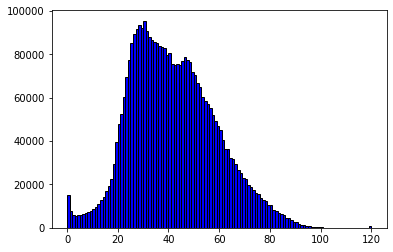

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['EDAD'], color='blue', edgecolor='black', bins=120)

# claramente aparecem outliers perto dos 120 anos de idade
# aparenta uma distribuição ligeiramente enviesada à direita

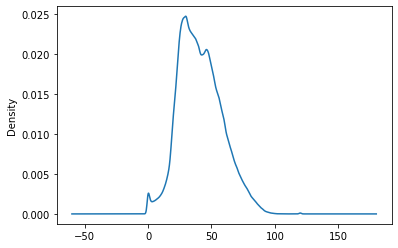

In [ ]:
df['EDAD'].plot.density()

Para averiguar a hipótese de normalidade da distribuição das idades dos pacientes nestes dados, podemos traçar o QQ-plot que permita comparar os quantis da distribuição normal com os da distribuição de idades que temos em mãos.

Em caso de normalidade da distribuição das idades, o gráfico seria aproximadamente uma diagonal coincidente com a bissectriz do primeiro quadrante.

Tal como podemos facilmente constatar no gráfico abaixo, não é isso que acontece, claramente.

Temos em mãos um caso de distribuição não normal de uma variável preditiva contínua, a idade.

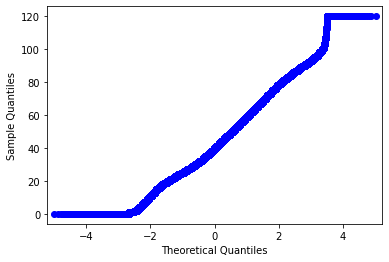

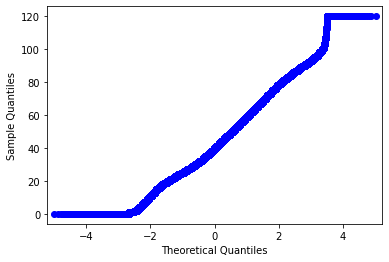

In [ ]:
import statsmodels.api as sm
sm.qqplot(df['EDAD'])

# parece claro não seguir uma distribuição normal

Posteriormente, decidimos investigar mais a fundo a existência de outliers, que já tinhamos constatado acima, quando reparámos que a idade máxima neste dataframe é de 120.

Para isso recorremos, primeiro, a um boxplot, em que os pontos que aparecem acima dos "bigodes" do gráfico correspondem a outliers na sua definição clássica, ou seja observações com valores que correspondem a Q3 + 1.5 * IQR, sendo o IQR o intervalo interquartis, ou a diferença entre o valor do terceiro quartil e o do primeiro quartil.

Neste caso, não temos outliers "inferiores", de valor Q1 - 1.5 * IQR.

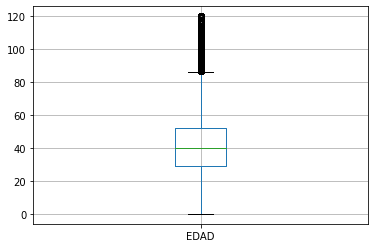

In [ ]:
df.boxplot('EDAD')

# temos alguns outliers com que temos de lidar
# parece que a maior parte desses outliers está acima de 100, o que não é uma idade muito credível

O método de Tukey, que define como outliers os valores que verifiquem a condição Q3 + 1.5 * IQR ou Q1 - 1.5 * IQR, sugere que idades acima de 86.5 serão outliers. Neste contexto, os outliers devem-se provavelmente a erros no registo dos dados. Podemos eliminar essas observações para garantir que não temos dados "errados".

No entanto, podemos perfeitamente estar perante dados não errados, mas que são apenas idades especialmente avançadas. Eliminá-las implicaria perda de informação, sobretudo considerando que estamos nm contexto médico a tentar classificar doentes de risco. A idade parece, à partida, um factor importante, sobretudo a idade avançada.

Como idades acima de 86 anos não parecem ser completamente inacreditáveis, vamos apenas eliminar observações com idade acima de 100, esse sim um valor excepcionalmente elevado.

In [ ]:
Q1 = df['EDAD'].quantile(0.25)
Q3 = df['EDAD'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)
print(Q3 + 1.5 * IQR)

# O método de Tukey sugere que valores acima de 86.5 serão outliers. Podemos eliminar essas observações para garantir que não temos dados "errados"
# Mas idades pouco acima de 86 anos não são completamente inacreditáveis...
# podíamos se calhar eliminar apenas as idades acima dos 100

29.0
52.0
23.0
86.5


Aparentemente temos 1358 indivíduos na amostra com idade superior a 100 anos. Este valor não parece de todo realista, comprovando a tese de que provavelmente se tratam de erros de registo, dando fundamento à nossa decisão de os remover da análise.

In [ ]:
len(df[(df['EDAD']> 100)])

1358

In [ ]:
df = df[df.EDAD < 100]

In [ ]:
df = df[df.EDAD > 0]

## Gráficos

Segue-se mais alguma análise exploratória dos dados através de gráficos.

Vamos utilizar para estes gráficos o dataframe obtido antes da conversão dos valores 97, 98 e 99 para NaN, de forma a podermos visualizar também nestes gráficos a frquência e proporção de missing values em cada dimensão considerada

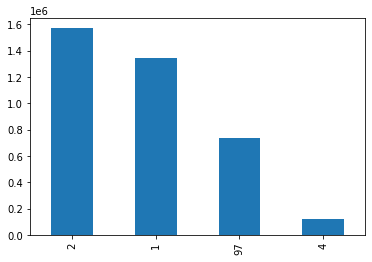

In [ ]:
df['RESULTADO_LAB'].value_counts().plot.bar()

# A variável RESULTADO_LAB documenta do resultado do teste covid feito pelo paciente no laboratório

# O valor 4 não parece ter significado, pois o resultado do teste é positivo ou não, sendo uma variável binária

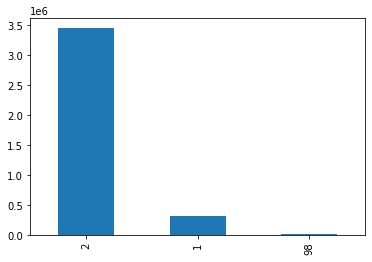

In [ ]:
df['TABAQUISMO'].value_counts().plot.bar()

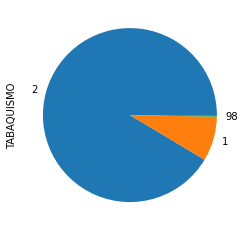

In [ ]:
df['TABAQUISMO'].value_counts().plot.pie() 

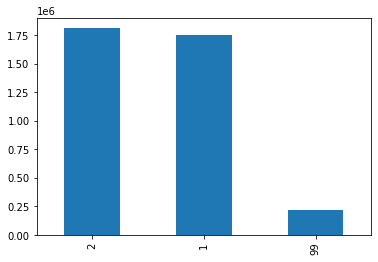

In [ ]:
df['OTRO_CASO'].value_counts().plot.bar()

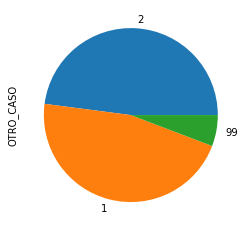

In [ ]:
df['OTRO_CASO'].value_counts().plot.pie() 

Em relação à população indígena, temos claramente uma amostra muitíssimo pequena face ao tamanho do dataset. A quase totalidade das respostas é "Não" (valor 2) e até temos mais "não respostas" (missing values) do que respostas positivas.

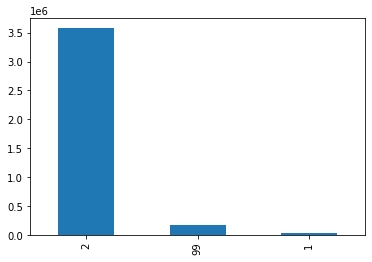

In [ ]:
df['INDIGENA'].value_counts().plot.bar() 

# com uma amostra tao pequena de população indígena podemos mesmo tirar conclusões?

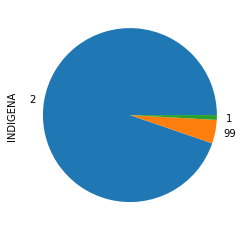

In [ ]:
df['INDIGENA'].value_counts().plot.pie() 

Temos também, neste dataset, informação acerca de se cada paciente fala língua indígena. O mesmo cenário que foi descrito anteriormente para a variável INDIGENA se verifica também nesta.

Coloca-se também a questão da relevância desta variável num contexto de previsão de doentes de risco. O que poderá o idioma falado ter a ver com o risco de contrair uma doença com prognóstico grave?

Claro que, se quisermos, podemos sempre argumentar que pessoas que falam uma certa língua provavelmente pertencem a uma certa comunidade, que pode ter certas características que determinam a sua susceptibilidade a uma doença.

No entanto, é apenas um hipotético e num dataset com 40 atributos, não parece ter muita importância, sobretudo quando comparado com outras variáveis que mais facilmente e directamente podemos ligar à probabilidade de sobreviver a uma doença infecciosa, como a idade ou ser fumador, por exemplo.

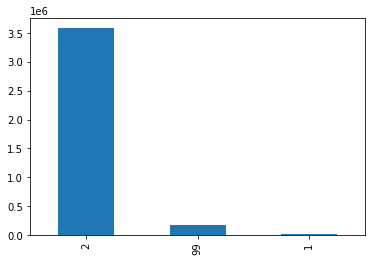

In [ ]:
df['HABLA_LENGUA_INDIG'].value_counts().plot.bar()

A variável MIGRANTE praticamente não tem dados válidos para os indivíduos do dataset, sendo difícil justificar a sua inclusão no nosso trabalho.

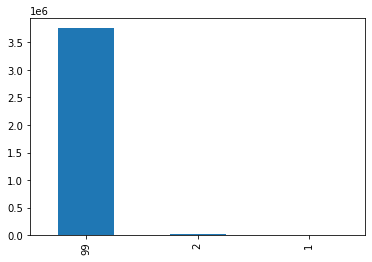

In [ ]:
df['MIGRANTE'].value_counts().plot.bar()

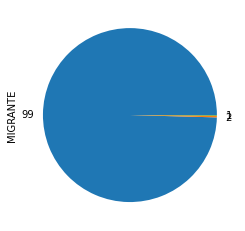

In [ ]:
df['MIGRANTE'].value_counts().plot.pie()

A variável EMBARAZO regista se os indivíduos admitidos têm uma gravidez a decorrer ou não.

Intuitivamente, esta parece ser uma variável importante para a análise e previsão do potencial prognóstico de uma mulher, pois uma gravidez certamente tem impacto na biologia da mulher e na sua capacidade de recuperação de uma doença grave.

Contudo, pelo gráfico abaixo, reparamos que temos imensos missing values (97 ou 98).

Os missing values, por si só, representam quase metade dos indivíduos do dataset, ficando com muito poucos registos de pessoas efectivamente grávidas.

Aparentemente, em quase 4 milhões de indivíduos, temos apenas cerca de 28 mil grávidas confirmadas. Esse valor não parece ser muito realista, sobretudo quando quase metade da amostra são missing values (97 corresponde a não sabe), em que o seu estado de gravidez ou não é uma incógnita.

Estes registo claramente parece ter problemas e não é claro o quão informativa esta variável consegue ser, nestas circunstâncias.

Fica assim em dúvida se a sua inclusão no dataset para o nosso trabalho se justifica.

28847

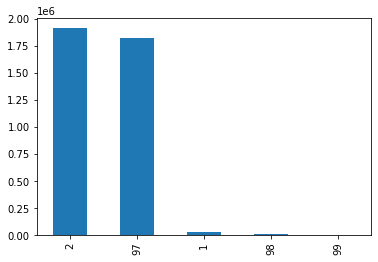

In [ ]:
df['EMBARAZO'].value_counts().plot.bar()
len(df[(df['EMBARAZO'] == 1)])

Seguem-se mais alguns gráficos que retratam as frequências e proporções de atributos que documentam comorbilidades relevantes para avaliar o potencial prognóstico de um doente.

Estas variáveis, para além de muito relevantes numa primeira análise, apresentam-se bastante "completas", com poucos missing values.

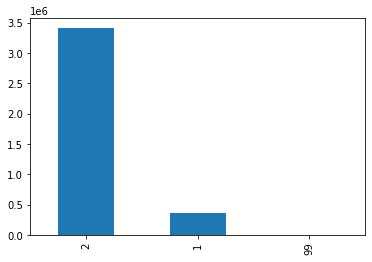

In [ ]:
df['NEUMONIA'].value_counts().plot.bar()

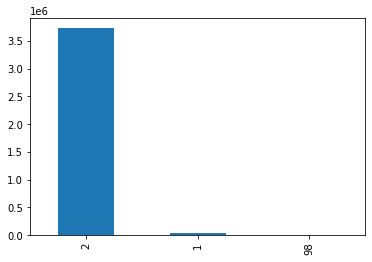

In [ ]:
df['EPOC'].value_counts().plot.bar()

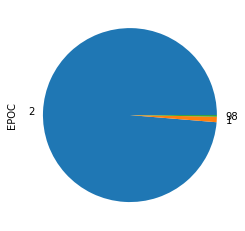

In [ ]:
df['EPOC'].value_counts().plot.pie()

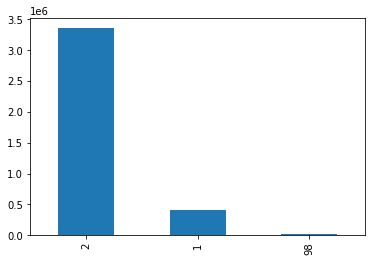

In [ ]:
df['DIABETES'].value_counts().plot.bar()

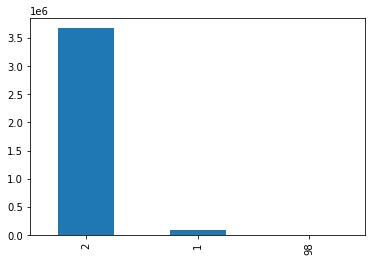

In [ ]:
df['ASMA'].value_counts().plot.bar()

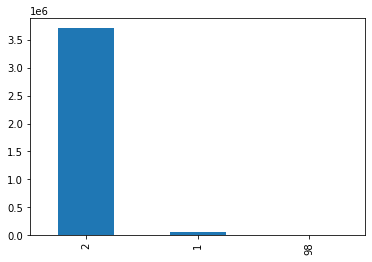

In [ ]:
df['CARDIOVASCULAR'].value_counts().plot.bar()

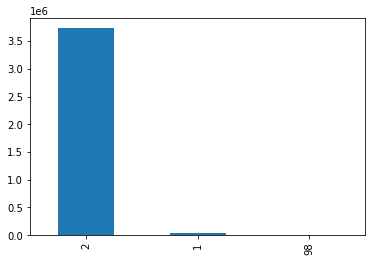

In [ ]:
df['INMUSUPR'].value_counts().plot.bar()

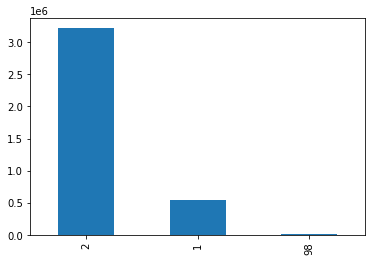

In [ ]:
df['HIPERTENSION'].value_counts().plot.bar()

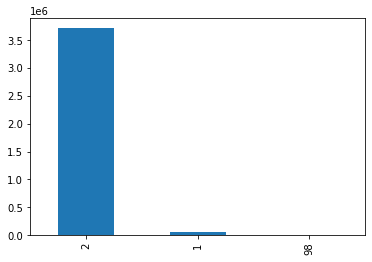

In [ ]:
df['RENAL_CRONICA'].value_counts().plot.bar()

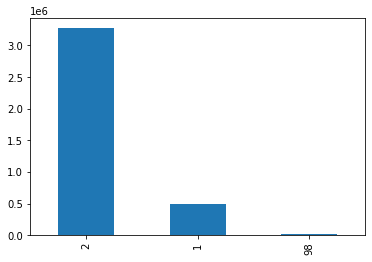

In [ ]:
df['OBESIDAD'].value_counts().plot.bar()

Em relação à variável NACIONALIDAD, que documenta se o paciente é mexicano ou não, vemos que temos muito poucos exemplos de indivíduos não mexicanos. Apenas cerca de 17 mil, dentro da nossa amostra de quase 4 milhões.

Esta pequeníssima amostra de não mexicanos talvez faça sentido, se considerarmos que o mundo inteiro passou por vários períodos de lockdown e isolamento da população, com fronteiras fechadas.

Mesmo assim não deixa de ser um valor surpreendente.

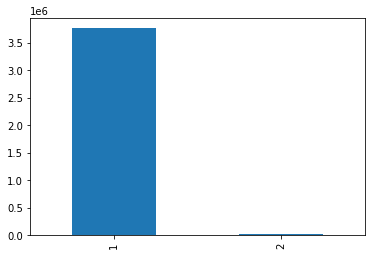

In [ ]:
df['NACIONALIDAD'].value_counts().plot.bar()

In [ ]:
len(df[(df['NACIONALIDAD'] == 2)])

17484

De acordo com o gráfico abaixo, o número de casos concentra-se num pequeno número de municípios com um decréscimo gradual a partir de 150000 casos no município de maior risco. Isto pode-se dever à densidade populacional de certos municípios onde o maior número de habitantes pode levar a uma maior propagação do vírus e elevada dificuldade dos cuidados hospitalares lidarem com o alastramento de contaminações. Outras variáveis demográficas tais como o estado do qual o paciente era proveniente não provaram ser significativas para o problema deste projeto por tanto foram removidas com o intuito de diminuir a complexidade da base de dados para os modelos preditivos. 

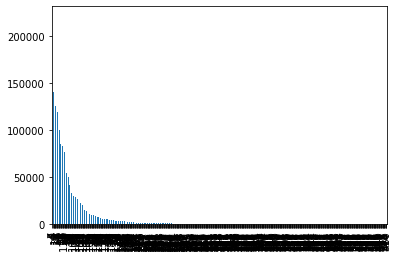

In [ ]:
df['MUNICIPIO_RES'].value_counts().plot.bar() # tem muitas classes

# o municipio de residencia tem mais do que duas classes

In [ ]:
print(len(df['MUNICIPIO_RES'].unique()))

520


In [ ]:
print(df['ENTIDAD_NAC'].unique())

[24 14  8  9  7 10 19 15 31 28 27 18 12 29  2 26 32 21  4  1 23  5 13 16
 22  6 30  3 17 25 99 11 20]


In [ ]:
print(df['CLASIFICACION_FINAL'].unique())

[3 7 6 5 1 2 4]


In [ ]:
print(df['ENTIDAD_RES'].unique())

[24 14  8  9  7 19 15 31  1 27 18 13 12 29 22  2 26 32  4 21 23  5 20 10
  6 30  3 28 25 16 17 11]


A variável TIPO_PACIENTE documenta se o paciente foi visto em ambulatório ou se foi hospitalizado.

Neste trabalho, em que estamos a tentar identificar doentes de risco com forte probabilidade de morrer, faz todo o sentido concentrar o nosso estudo nos pacientes que são admitidos como hospitalizados, pois são esses que estão a manifestar sintomas fortes e que podem mais facilmente drenar recursos materiais e humanos do hospital, se os profissionais tomarem más decisões. É em relação a estes que têm de ser tomadas as decisões mais importantes, e em que detectar quem está em maior risco se torna mais importante.

Se um paciente é visto em ambulatório, é porque o seu estado não levanta grandes preocupações.

Claro que, mesmo nos doentes que estão em ambulatório, há sempre risco associado ao seu estado de saúde e prognóstico. Detectar doentes em risco tem valor e é útil, mesmo entre aqueles que são atendidos em ambulatório. Mas é preciso considerar que temos um dataset com milhões de registos e dezenas de atributos.

Temos de focar a nossa análise de alguma forma, para que a aplicação dos modelos preditivos, muitos deles bastante exigentes em termos de recursos computacionais, seja possível e realista, face aos computadores de que o nosso grupo dispõe. 

De facto, se olharmos para a frquência dos dois tipos de paciente, vemos que a esmagadora maioria dos doentes registados neste dataset se encontra em ambulatório (valor 1)

In [ ]:
df.groupby('TIPO_PACIENTE')['TIPO_PACIENTE'].count()

TIPO_PACIENTE
1    3264644
2     498543
Name: TIPO_PACIENTE, dtype: int64

Conseguimos fundamentar ainda mais a nossa decisão de nos focarmos apenas dos doentes hospitalizados ao atentar nos dois dataframes gerados em baixo.

Ao separarmos os indivíduos correspondentes ao tipo 1 (ambulatório), ficamos com um dataframe com mais de 3 milhões de registos, como seria de esperar pelo que vimos na célula de código anterior.

Mas, se desse novo dataframe gerado tirarmos ainda um subset que corresponde aos pacientes do tipo 1 que efectivamente morreram, ficamos com um dataset composto por apenas 17 mil indivíduos. Ou seja, apenas 0.5% desses indivíduos efectivamente morreu.

Os doentes em ambulatório claramente não representam uma fonte significativa de mortalidade que justifique a sua inclusão na análise.

In [ ]:
tipo = df.loc[df["TIPO_PACIENTE"] == 1, :]
print("Temos",tipo.shape[0],"pacientes tipo 1 (ambulatório)")

Temos 3264644 pacientes tipo 1 (ambulatório)


In [ ]:
tipo_morto = tipo.loc[tipo["MORREU"] == 1, :]
print("Temos",tipo_morto.shape[0],"pacientes tipo 1 (ambulatório) que realmente morreram")

Temos 16975 pacientes tipo 1 (ambulatório) que realmente morreram


Contrastando o que foi verificado nos dois dataframes anteriores com os dois que colocamos a seguir, vemos que o caso muda completamente de figura.

Quando consideramos apenas a amostra de pacientes classificados com o tipo 2, temos um dataframe com cerca de 498 mil registos.
Se destes extrairmos aqueles que efectivamente morreram, como fizemos mais abaixo, vemos que ficamos com quase 190 mil registos.

Portanto, temos cerca de 6 vezes menos pacientes hospitalizados, mas mais de 10 vezes o número de mortos. De menos de 1% de mortalidade passamos para cerca de 38%.

Pensamos que, face a estes dados, a nossa opção de focar a análise em pacientes do tipo 2 fica suficientemente fundamentada.

In [ ]:
tipo2 = df.loc[df["TIPO_PACIENTE"] == 2, :]
print("Temos",tipo2.shape[0],"pacientes tipo 2 (hospitalizados)")

Temos 498543 pacientes tipo 2 (hospitalizados)


In [ ]:
tipo2_morto = tipo2.loc[tipo2["MORREU"] == 1, :]
print("Temos",tipo2_morto.shape[0],"pacientes tipo 2 (hospitalizados) que realmente morreram")

Temos 189805 pacientes tipo 2 (hospitalizados) que realmente morreram


In [ ]:
print(df['SEXO'].unique())

[1 2]


Neste gráfico vemos que, apesar de o facto de um doente ter sido entubado ou não, ser pelo menos intuitivamente, uma variável importante na determinação do risco de morte por COVID, temos na realidade poucos valores válidos neste dataset, e muito poucos registos positivos. Torna-se difícil incluir esta variável na nossa análise.

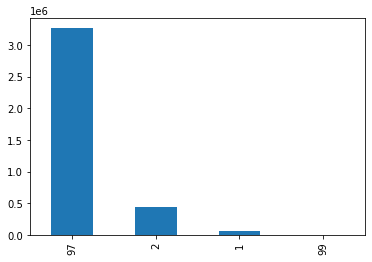

In [ ]:
df['INTUBADO'].value_counts().plot.bar()

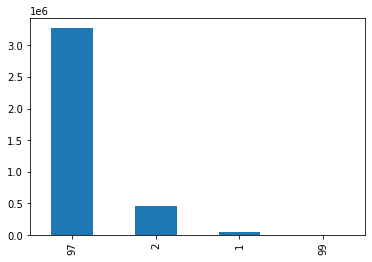

In [ ]:
df['UCI'].value_counts().plot.bar()

In [ ]:
len(df[(df['INTUBADO'] == 99)]) 

6062

Como se pode verificar, a variedade de países de origem dos habitantes é extremamente elevada, mas de um ponto de vista medicinal, talvez não seja muito relevante o país de origem do habitante pelo que os dados foram alterados para identificar apenas caso o habitante era de origem mexicana ou do estrangeiro. 

In [ ]:
print(df['PAIS_ORIGEN'].unique()) # one-hot encoding vai ser necessário, se usarmos esta coluna, em certas técnicas

['97' 'Guatemala' 'Nicaragua' 'Venezuela' 'Japón' 'Otro'
 'República de Honduras' 'Estados Unidos de América' 'Camerún'
 'El Salvador' 'Colombia' 'Perú' 'Cuba' 'Bolivia' 'Chile' 'Eritrea'
 'España' 'Canadá' 'Dinamarca' 'Brasil' 'Belice' 'Haití' 'Ecuador'
 'Irlanda' 'Costa de Marfil' 'Italia' 'Francia' 'Argentina' 'Suecia'
 'Nigeria' 'India' 'Israel' 'República Dominicana' 'Indonesia' 'Alemania'
 'Turquía' 'Australia' 'República Oriental del Uruguay' 'Libia' 'Egipto'
 'China' 'Gran Bretaña (Reino Unido)' 'Filipinas' 'Suiza'
 'República Democrática de Corea' 'Paraguay' 'Congo' 'Ucrania' 'Ghana'
 'Líbano' 'República de Corea' 'Croacia' 'Marruecos' 'Rusia' 'Portugal'
 'Sudáfrica' 'Taiwán' 'Guinea' 'Grecia' 'Malasia' 'SE DESCONOCE' 'Camboya'
 'Estado Libre Asociado de Puerto Rico' 'Argelia' 'Polonia' 'Bélgica'
 'Pakistán' 'Eslovaquia' 'Guadalupe' 'Austria' 'Tayikistán'
 'República de Panamá' 'Bulgaria' 'Holanda' 'Togo'
 'República de Costa Rica' 'Siria' 'Rumania' 'Hungría'
 'Papúa Nueva Gui

In [ ]:
print(df['PAIS_NACIONALIDAD'].unique()) # também tem muitas classes. Também é necessário One Hot Encoding para certas técnicas

['México' 'Bolivia' 'Estados Unidos de América' 'Canadá' 'Guatemala'
 'Nicaragua' 'República Dominicana' 'Venezuela' 'Colombia' 'Perú' 'Japón'
 'Otro' 'República de Angola' 'Cuba' 'Pakistán' 'República de Honduras'
 'Israel' 'Camerún' 'El Salvador' 'China' 'Suiza'
 'Gran Bretaña (Reino Unido)' 'Alemania' 'Rusia' 'Ucrania' 'Italia'
 'España' 'Chile' 'Eritrea' 'República Oriental del Uruguay'
 'República de Panamá' 'Haití' 'Francia' 'Islandia' 'Paraguay'
 'Zona Neutral' 'Nigeria' 'Irlanda' 'Dinamarca' 'República de Costa Rica'
 'Guyana Francesa' 'India' 'Macao' 'Brasil' 'Belice' 'Ecuador' 'Líbano'
 'Argentina' 'Costa de Marfil' 'Arabia Saudita' 'Portugal' 'Suecia'
 'Filipinas' 'Austria' 'Finlandia' 'Rumania' 'Letonia' 'Libia'
 'República de Corea' 'Indonesia' 'Eslovaquia' 'Eslovenia' 'Bélgica'
 'Bangladesh' 'Hungría' 'Turquía' 'Australia' 'Holanda' 'Egipto' 'Taiwán'
 'Polonia' 'Noruega' 'Islas Vírgenes de Estados Unidos de América'
 'República de Guyana' 'República Democrática de Corea' 

In [ ]:
migrantes = df[df['MIGRANTE'] == 1]
migrantes

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
835,2021-10-31,04d688,1,12,23,1,99,23,8,2,2020-04-12,2020-04-06,2020-05-12,1,1,68,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,1,Guatemala,Guatemala,2
931,2021-10-31,027872,1,12,22,2,99,22,4,2,2020-04-12,2020-04-09,2020-04-13,2,1,41,2,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1,2,2,97,7,1,Nicaragua,Nicaragua,2
1919,2021-10-31,13fae0,2,12,2,2,99,2,2,1,2020-04-13,2020-04-05,9999-99-99,97,2,65,2,97,2,2,1,2,2,2,2,2,2,2,2,2,2,2,97,2,97,6,1,Guatemala,Guatemala,97
2134,2021-10-31,11da07,1,12,19,2,99,19,39,1,2020-04-13,2020-04-12,9999-99-99,97,2,31,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,1,Venezuela,Venezuela,97
3091,2021-10-31,1b5de2,2,9,22,2,99,22,14,1,2020-04-13,2020-04-10,9999-99-99,97,2,38,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,1,Japón,Japón,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770274,2021-10-31,349d39,2,12,17,2,99,17,6,1,2020-12-26,2020-12-26,9999-99-99,97,2,22,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,1,Estados Unidos de América,Estados Unidos de América,97
3771230,2021-10-31,2454bd,2,12,22,2,99,22,14,1,2020-12-09,2020-12-05,9999-99-99,97,2,38,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,1,Alemania,Alemania,97
3775918,2021-10-31,86806a,2,12,9,2,99,9,5,1,2020-12-18,2020-12-10,9999-99-99,97,2,40,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,1,Venezuela,Venezuela,97
3776251,2021-10-31,79b803,2,12,9,1,99,9,3,1,2020-12-05,2020-12-05,9999-99-99,97,2,32,2,2,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,1,Colombia,Colombia,97


In [ ]:
len(migrantes[(migrantes['PAIS_NACIONALIDAD'] == "México")]) # Quando o individuo é migrante, não é mexicano, em principio

0

In [ ]:
len(migrantes[(migrantes['PAIS_ORIGEN'] == "México")]) # Quando é migrante, o País de Origem não é o México

0

In [ ]:
print(
    len(migrantes[(migrantes['PAIS_ORIGEN'] == 99)]),
    len(migrantes[(migrantes['PAIS_ORIGEN'] == 98)]),
    len(migrantes[(migrantes['PAIS_ORIGEN'] == 97)])
)

0 0 0


In [ ]:
nao_migrantes = df[df['MIGRANTE'] == 2]
nao_migrantes

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
644,2021-10-31,142905,2,12,28,2,99,28,32,1,2020-04-12,2020-04-10,9999-99-99,97,2,28,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,2,Estados Unidos de América,97,97
649,2021-10-31,155943,2,12,28,1,99,28,32,1,2020-04-12,2020-04-12,9999-99-99,97,2,26,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,2,Estados Unidos de América,97,97
735,2021-10-31,1b5aee,1,12,3,2,99,3,3,1,2020-04-12,2020-04-08,9999-99-99,97,2,38,2,97,2,2,2,2,2,2,2,2,1,2,2,2,1,2,97,2,97,6,2,Canadá,97,97
894,2021-10-31,05fdef,2,12,9,2,99,9,2,1,2020-04-12,2020-04-06,9999-99-99,97,2,21,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,2,Guatemala,97,97
981,2021-10-31,02d1de,1,12,1,2,99,1,7,1,2020-04-12,2020-04-12,9999-99-99,97,2,20,2,97,2,2,2,2,2,2,2,98,2,2,2,2,99,1,2,2,97,7,2,Estados Unidos de América,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779205,2021-10-31,7c0da0,2,12,9,1,99,9,10,1,2020-11-25,2020-11-25,9999-99-99,97,2,24,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,1,2,7,2,España,97,97
3779206,2021-10-31,7f09b7,2,12,9,2,99,15,37,1,2021-01-05,2020-12-27,9999-99-99,97,2,35,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,2,Argentina,97,97
3779321,2021-10-31,5f303e,2,9,9,1,99,9,16,1,2020-09-22,2020-09-22,9999-99-99,97,2,20,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,4,2,97,6,2,Venezuela,97,97
3779377,2021-10-31,74b21b,2,9,9,2,99,9,14,1,2020-10-07,2020-10-07,9999-99-99,97,2,54,2,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,4,2,97,6,2,Bulgaria,97,97


In [ ]:
print(nao_migrantes['PAIS_ORIGEN'].unique()) # Em todos os não migrantes, o pais de origem não foi registado. Talvez porque obviamente será o México.

['97']


In [ ]:
print(nao_migrantes['PAIS_NACIONALIDAD'].unique())

['Estados Unidos de América' 'Canadá' 'Guatemala' 'Colombia'
 'República de Angola' 'Perú' 'Cuba' 'Pakistán' 'Venezuela' 'Israel'
 'Nicaragua' 'China' 'Suiza' 'Bolivia' 'Rusia' 'Ucrania' 'España'
 'República Oriental del Uruguay' 'República de Panamá' 'Alemania'
 'Francia' 'Islandia' 'Paraguay' 'Irlanda' 'República de Costa Rica'
 'India' 'República de Honduras' 'Otro' 'Haití' 'Ecuador'
 'República Dominicana' 'Líbano' 'Brasil' 'Gran Bretaña (Reino Unido)'
 'Italia' 'Arabia Saudita' 'Argentina' 'El Salvador' 'Portugal'
 'Dinamarca' 'Japón' 'Belice' 'Suecia' 'Filipinas' 'Chile' 'Austria'
 'Finlandia' 'Rumania' 'Letonia' 'Libia' 'República de Corea' 'Eslovaquia'
 'Eslovenia' 'Bélgica' 'Bangladesh' 'Hungría' 'Australia' 'Holanda'
 'Taiwán' 'Polonia' 'Islas Vírgenes de Estados Unidos de América' 'Egipto'
 'Noruega' 'República de Guyana' 'SE DESCONOCE'
 'República Checa y República Eslovaca' 'Irán' 'Jamaica' 'Indonesia'
 'Republica Democrática del Congo' 'Ghana' 'Vietnam' 'Siria' 'Turquía'


In [ ]:
migrantes_ind = df[df['MIGRANTE'] == 99]
migrantes_ind

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,9999-99-99,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,9999-99-99,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,9999-99-99,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,9999-99-99,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
5,2021-10-31,z393a3,1,12,9,1,9,9,17,1,2020-12-28,2020-12-28,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2021-10-31,94d648,2,9,9,1,15,15,58,2,2020-12-17,2020-12-14,2020-12-19,2,1,83,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2
3779637,2021-10-31,bb6edb,2,9,9,2,15,15,25,2,2020-04-27,2020-04-15,2020-04-28,2,1,36,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,2
3779638,2021-10-31,7d32d9,2,9,9,2,9,9,7,2,2020-12-05,2020-12-01,2020-12-08,1,1,82,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,México,97,1
3779639,2021-10-31,660ba7,1,4,9,1,9,9,7,2,2020-09-11,2020-09-09,2020-09-12,2,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,México,97,2


In [ ]:
print(migrantes_ind['PAIS_NACIONALIDAD'].unique())

['México' 'Bolivia' 'República Dominicana' 'Perú' 'Colombia' 'Nicaragua'
 'Estados Unidos de América' 'Gran Bretaña (Reino Unido)' 'Otro'
 'Venezuela' 'Cuba' 'Alemania' 'Guatemala' 'Italia' 'España' 'Haití'
 'Zona Neutral' 'República de Honduras' 'Nigeria' 'El Salvador'
 'Guyana Francesa' 'Macao' 'Japón' 'Paraguay' 'Argentina' 'China'
 'Ecuador' 'Brasil' 'Belice' 'República de Panamá' 'Francia'
 'República Oriental del Uruguay' 'Chile' 'Noruega' 'Canadá' 'Indonesia'
 'India' 'Azerbaiyán - Islas Azores' 'Taiwán' 'Nepal' 'Líbano' 'Bulgaria'
 'Argelia' 'República de Corea' 'Hungría' 'Suiza' 'Yemen Democrática'
 'Bangladesh' 'Togo' 'Arabia Saudita' 'Rusia' 'Pakistán' 'Macedonia'
 'Bélgica' 'República de Costa Rica' 'República Centro Africana' 'Egipto'
 'Portugal' 'Camerún' 'Holanda' 'Kenia' 'Ucrania' 'Irlanda' 'Irán'
 'Filipinas' 'República Checa y República Eslovaca' 'Dinamarca'
 'Antártica' 'Estado Libre Asociado de Puerto Rico' 'Sudáfrica' 'Sark'
 'República Democrática de Corea' 'Afgan

In [ ]:
print(migrantes_ind['PAIS_ORIGEN'].unique())

['97']


###**Correlations**

Podemos também analisar a matriz dos coeficientes de correlação das variáveis do nosso dataset. É o coeficiente de correlação de Pearson que está a ser calculado.

Para as variáveis contínuas, o coeficiente de correlação de Pearson tem a interpretação típica que todos conhecemos.

A maior parte das nossas variáveis são binárias, mas mesmo assim o coeficiente de correlação de Pearson tem significado e é interpretável como a associação entre as duas variáveis.
De acordo com [esta](https://en.wikipedia.org/wiki/Phi_coefficient) página de Wikipedia, o coeficiente de correlação de Pearson calculado em variáveis binárias corresponde ao coeficiente Phi (ou Matthews correlation coefficient (MCC)), que tem a interpretação já referida.



In [ ]:
dfn.corr()

# usamos o dfn (dataframe em que 97, 98 e 99 foram convertidos em NaN) porque esses valores muito grandes podem afectar o cálculo

# Não conseguimos identificar variáveis com correlação próxima de 1 ou -1

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI,DIAS_SINTOMAS
ORIGEN,1.000000,0.153086,-0.179314,-0.002874,-0.156423,-0.168135,-0.049219,-0.185873,0.002212,0.150801,-0.062538,0.004144,-0.000620,0.026380,0.019846,0.055622,0.021017,0.004995,0.013649,0.052671,0.027892,0.019189,0.017237,0.041569,-0.015375,-0.088860,0.009890,0.072332,-0.141173,0.017759,0.054986,-0.014565,-0.044692,-0.027606
SECTOR,0.153086,1.000000,-0.107966,-0.010255,-0.094558,-0.095055,-0.107047,-0.250317,-0.027598,0.165041,-0.092620,0.024703,0.016391,-0.023607,-0.028667,0.084454,0.040390,0.012782,0.028480,0.100954,0.138207,0.032521,0.050851,0.072484,-0.026260,-0.188116,0.129078,0.101601,-0.215810,0.153134,0.128087,-0.079610,-0.207482,-0.081063
ENTIDAD_UM,-0.179314,-0.107966,1.000000,0.009033,0.820764,0.971767,0.271849,0.064203,0.043510,-0.044202,0.029113,-0.006069,-0.027162,-0.043350,-0.050895,-0.031409,-0.010682,-0.011096,-0.001202,-0.035491,-0.010995,-0.006818,-0.031490,-0.016903,0.054258,0.067571,-0.209840,-0.057147,0.228420,-0.098817,-0.068233,-0.049934,-0.013437,0.063300
SEXO,-0.002874,-0.010255,0.009033,1.000000,0.012176,0.012760,0.015946,0.078475,-0.044035,-0.069482,0.018670,0.008517,NaN,-0.005498,-0.005402,-0.007110,-0.002644,0.038561,0.005762,0.002226,0.017586,-0.011387,0.018698,-0.014962,-0.095445,0.045449,-0.001021,-0.026908,0.008820,-0.010098,-0.038339,-0.033912,-0.025932,0.006757
ENTIDAD_NAC,-0.156423,-0.094558,0.820764,0.012176,1.000000,0.824059,0.225512,0.066866,0.021941,-0.047541,0.043732,NaN,-0.025105,-0.045410,-0.051018,-0.037181,-0.011740,-0.010175,-0.003116,-0.042905,-0.013737,-0.008328,-0.029997,-0.016047,0.053395,0.072203,-0.162750,-0.056714,0.192237,-0.044545,-0.061194,NaN,-0.017532,0.057905
ENTIDAD_RES,-0.168135,-0.095055,0.971767,0.012760,0.824059,1.000000,0.299167,0.064868,0.036602,-0.044666,0.027494,-0.007688,-0.025155,-0.042853,-0.050028,-0.029343,-0.009705,-0.008820,-0.004364,-0.032395,-0.011076,-0.007135,-0.031235,-0.016125,0.050196,0.065346,-0.190911,-0.053728,0.205661,-0.073197,-0.064575,-0.043849,-0.017210,0.058196
MUNICIPIO_RES,-0.049219,-0.107047,0.271849,0.015946,0.225512,0.299167,1.000000,0.082891,0.006917,-0.068917,0.026956,-0.004504,-0.002939,-0.045007,-0.054498,-0.018690,-0.012838,0.006261,-0.012388,-0.010745,-0.019336,-0.006132,-0.010820,-0.019102,0.025575,0.053292,-0.097861,-0.026267,0.137321,-0.047281,-0.061066,-0.021054,-0.003303,0.019931
TIPO_PACIENTE,-0.185873,-0.250317,0.064203,0.078475,0.066866,0.064868,0.082891,1.000000,NaN,-0.670663,0.334752,-0.011311,-0.026237,-0.029124,-0.023718,-0.256445,-0.113262,0.008146,-0.080356,-0.241060,-0.106366,-0.105557,-0.076429,-0.162980,0.003988,0.174139,-0.114755,-0.110988,0.135518,-0.105045,-0.188354,-0.019712,NaN,0.128090
INTUBADO,0.002212,-0.027598,0.043510,-0.044035,0.021941,0.036602,0.006917,NaN,1.000000,0.166521,-0.062965,-0.000617,-0.034982,-0.005233,-0.005449,0.031399,0.001674,-0.004140,0.000920,0.037511,0.005257,0.007524,0.043467,-0.002417,0.008395,0.010072,-0.020398,0.059471,-0.018762,0.085111,0.092946,-0.011237,0.344676,-0.020946
NEUMONIA,0.150801,0.165041,-0.044202,-0.069482,-0.047541,-0.044666,-0.068917,-0.670663,0.166521,1.000000,-0.284586,0.008932,-0.011427,0.025310,0.020893,0.210705,0.092061,-0.006354,0.055049,0.195944,0.070780,0.081176,0.074900,0.118179,0.000516,-0.113998,0.092220,0.105212,-0.106494,0.098592,0.176928,0.013102,0.144268,-0.131942


# 3.Data Preparation
# Dropping Columns





Como parte do preprocessamento e preparação dos dados, vamos realizar uma feature selection, em que vamos escolher certas variáveis para manter na nossa amostra e vamos descartar outras.

Existem variáveis que não têm qualquer tipo de utilidade, como a data de actualização do registo ou o ID do paciente, e que podem ser seguramente removidas sem qualquer prejuízo em termos de informação relevante.

As datas de ingresso e sintomas já foram utilizadas para obter a váriável "DIAS_SINTOMAS" e podem ser removidas, pois a sua informação relevante já está contida no dataset.

As variáveis que dizem respeito a se o paciente fez um teste de antigénio ou laboratorial e qual o seu resultado são irrelevantes e redundantes, pois já existe uma variável chamada "CLASSIFICACION_FINAL" que documenta se o paciente é um caso de COVID, e coloca-o numa escala de 1 a 7.

As variáveis MIGRANTE, EMBARAZO e INTUBADO foram retiradas por estarem preenchidas sobretudo com missing values, sendo difícil fazer imputação de valores nessas circunstâncias.

Tal como foi explicado anteriormente, os atributos referentes a paises, estados ou municipios também foram retirados, pois a sua codificação levaria a um aumento demasiado grande da dimensionalidade da amostra, o que não se justifica face ao tipo de variáveis que são, considerando que não se espera que variáveis meramente demográficas tenham grande poder discriminativo em relação ao prognóstico de um doente. A relação não é muito directa e temos variáveis que aparentam ser mais relevantes, como Diabetes ou Asma.



In [ ]:
df1=df.drop(columns=['FECHA_ACTUALIZACION','ENTIDAD_NAC','ID_REGISTRO'
                     ,'PAIS_NACIONALIDAD','PAIS_ORIGEN', "TOMA_MUESTRA_LAB", "RESULTADO_LAB", "TOMA_MUESTRA_ANTIGENO", "RESULTADO_ANTIGENO",
                     "HABLA_LENGUA_INDIG", "MIGRANTE", "EMBARAZO", "INTUBADO", "FECHA_INGRESO", "FECHA_SINTOMAS", "MUNICIPIO_RES" , "NACIONALIDAD",
                     "ENTIDAD_UM", "ENTIDAD_RES", "INDIGENA"
                     ])
df.head(15)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,MORREU,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_SINTOMAS
1,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,0,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,6
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,0,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,4
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,0,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,8
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,0,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,1
5,2021-10-31,z393a3,1,12,9,1,9,9,17,1,2020-12-28,2020-12-28,0,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,México,97,97,0
6,2021-10-31,z59dea,1,12,7,2,7,7,78,1,2020-06-28,2020-06-24,0,97,2,47,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,2,97,2,97,6,99,México,97,97,4
7,2021-10-31,z5ba5b,2,12,8,2,10,8,37,1,2020-07-31,2020-07-28,0,97,2,38,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,3
8,2021-10-31,z1f605,2,12,7,2,7,7,24,1,2020-08-26,2020-08-20,0,97,99,42,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,6
9,2021-10-31,z4985e,2,12,19,2,19,19,39,1,2020-05-21,2020-05-21,0,97,2,26,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97,0
10,2021-10-31,z2eace,1,3,15,1,15,15,106,2,2020-09-23,2020-09-20,0,2,2,7,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,4,2,97,6,99,México,97,2,3


Como já foi dito, os missing values foram codificados como valores 97, 98 ou 99 nas diferentes colunas. Precisamos de, nesta fase de processamento dos dados, substituir esses valores por NaN, de forma a poderem ser reconhecidos como missing values pelo Python



In [ ]:
df1n=df1.replace(97, np.NaN)
df1n=df1n.replace(98, np.NaN)
df1n=df1n.replace(99, np.NaN)

Subsequentemente, vamos eliminar esses missing values, de forma a ficar com uma amostra do dataset inicial, mais pequena, que facilite a aplicação dos modelos de machine learning, sendo na mesma representativos da população e com um volume de dados significativo.

In [ ]:
df1n = df1n.dropna()
df1n

,ORIGEN,SECTOR,SEXO,TIPO_PACIENTE,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS
10,1,3.0,1,2,0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,3
39,1,12.0,2,2,0,2.0,14.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,6
45,2,13.0,2,2,0,1.0,60.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1
51,2,12.0,1,2,0,2.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,7
55,1,12.0,1,2,0,2.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2,9.0,1,2,1,1.0,83.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,3
3779637,2,9.0,2,2,1,1.0,36.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2.0,12
3779638,2,9.0,2,2,1,1.0,82.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1.0,4
3779639,1,4.0,1,2,1,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2


Nesta subamostra que criámos, continuamos com um número substancial de indivíduos nas classes que queremos prever

In [ ]:
mortos = df1n[(df1n['MORREU'] == 1)]
mortos

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,MORREU,NEUMONIA,EDAD,NACIONALIDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS
71,1,12.0,23,1,23,4.0,2,1,1.0,66.0,1,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2,1.0,3
135,1,12.0,32,1,32,56.0,2,1,1.0,30.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,0
151,1,12.0,28,2,28,32.0,2,1,1.0,56.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,7,2.0,8
172,1,4.0,15,1,15,122.0,2,1,1.0,10.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,40
192,2,4.0,9,2,15,31.0,2,1,1.0,42.0,1,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,1.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2,9.0,9,1,15,58.0,2,1,1.0,83.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,3
3779637,2,9.0,9,2,15,25.0,2,1,1.0,36.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2.0,12
3779638,2,9.0,9,2,9,7.0,2,1,1.0,82.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1.0,4
3779639,1,4.0,9,1,9,7.0,2,1,2.0,40.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2


In [ ]:
viveu = df1n[(df1n['MORREU'] == 2)]
viveu

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,MORREU,NEUMONIA,EDAD,NACIONALIDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS
10,1,3.0,15,1,15,106.0,2,2,2.0,7.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,3
39,1,12.0,12,2,12,59.0,2,2,2.0,14.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,6
45,2,13.0,19,2,19,39.0,2,2,1.0,60.0,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1
51,2,12.0,8,1,8,37.0,2,2,2.0,49.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,7
55,1,12.0,29,1,21,117.0,2,2,2.0,11.0,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779623,2,9.0,9,2,9,3.0,2,2,1.0,29.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,2.0,15
3779626,2,9.0,9,2,9,10.0,2,2,1.0,48.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,2.0,7
3779627,2,9.0,9,2,15,58.0,2,2,2.0,38.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0,7
3779628,2,9.0,9,2,15,33.0,2,2,1.0,47.0,1,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1,1.0,8


Tal como tínhamos explicado anteriormente, apenas vamos consideerar os doentes com a classificação Tipo de Paciente 2.

Como podemos ver, a amostra resultante do processo de eliminação dos missing values ficou apenas com indivíduos que pertencem ao Tipo de Paciente 2, que era o que pretendíamos.

In [ ]:
df1n.groupby('TIPO_PACIENTE')['TIPO_PACIENTE'].count()

TIPO_PACIENTE
2    392491
Name: TIPO_PACIENTE, dtype: int64

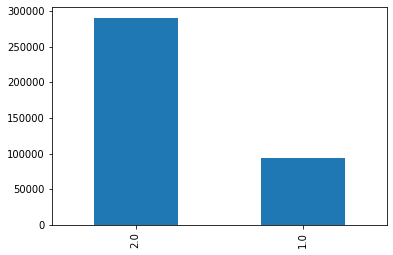

In [ ]:
df1n['OTRO_CASO'].value_counts().plot.bar()

Por questões de preferência e porque algum código, como o do Naive Bayes, não lida bem com variáveis binárias codificadas com valores que não o 0 e 1, vamos transformar todas as variáveis binárias neste dataset, codificadas em 1 e 2, em 0 e 1

In [ ]:
# Fazer encoding por 0 e 1 em vez de 1 e 2

df1n["SEXO"] = df["SEXO"] - 1
df1n["NEUMONIA"] = df["NEUMONIA"] - 1
df1n["DIABETES"] = df["DIABETES"] - 1
df1n["EPOC"] = df["EPOC"] - 1
df1n["ASMA"] = df["ASMA"] - 1
df1n["INMUSUPR"] = df["INMUSUPR"] - 1
df1n["HIPERTENSION"] = df["HIPERTENSION"] - 1
df1n["OTRA_COM"] = df["OTRA_COM"] - 1
df1n["CARDIOVASCULAR"] = df["CARDIOVASCULAR"] - 1
df1n["OBESIDAD"] = df["OBESIDAD"] - 1
df1n["RENAL_CRONICA"] = df["RENAL_CRONICA"] - 1
df1n["TABAQUISMO"] = df["TABAQUISMO"] - 1
df1n["OTRO_CASO"] = df["OTRO_CASO"] - 1
df1n["UCI"] = df["UCI"] - 1
df1n["ORIGEN"] = df["ORIGEN"] - 1
df1n


,ORIGEN,SECTOR,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS
10,0,3.0,0,0,1,7.0,1,1,1,1,1,1,1,0,1,1,1,6,1,3
39,0,12.0,1,0,1,14.0,1,1,1,1,1,1,1,1,1,1,1,6,1,6
45,1,13.0,1,0,0,60.0,0,1,1,1,1,1,1,1,1,1,1,3,0,1
51,1,12.0,0,0,1,49.0,1,1,1,1,1,1,1,1,1,1,0,3,1,7
55,0,12.0,0,0,1,11.0,0,1,1,1,1,1,1,0,1,1,1,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,1,9.0,0,1,0,83.0,1,1,1,1,1,1,1,1,1,1,1,2,1,3
3779637,1,9.0,1,1,0,36.0,1,1,1,1,1,1,1,1,1,1,0,2,1,12
3779638,1,9.0,1,1,0,82.0,1,1,1,1,1,1,1,1,1,1,0,2,0,4
3779639,0,4.0,0,1,1,40.0,1,1,1,1,1,1,1,1,1,1,1,2,1,2


In [ ]:
df1n=df1n.drop(columns=['TIPO_PACIENTE'])
df1n

,ORIGEN,SECTOR,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS
10,1,3.0,1,0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,3
39,1,12.0,2,0,2.0,14.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,6
45,2,13.0,2,0,1.0,60.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1
51,2,12.0,1,0,2.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,7
55,1,12.0,1,0,2.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2,9.0,1,1,1.0,83.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,3
3779637,2,9.0,2,1,1.0,36.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2.0,12
3779638,2,9.0,2,1,1.0,82.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1.0,4
3779639,1,4.0,1,1,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2


SECTOR é uma variável categórica codificada por números inteiros de 1 a 13, identificando o tipo de instituição que atendeu o doente.

Não conhecemos a existência de nenhum tipo de de relação hierárquica entre estes tipos de estabelecimento de saúde, logo, o ordinal encoding que lhes foi aplicado provavelmente não é a melhor forma de codificar estas categorias.

Podemos também observar, face à variável SECTOR, que a esmagadora maioria dos pacientes provém do sector 4 ou do sector 12, ficando os outros apenas com um relativamente baixo número de pacientes restantes

In [ ]:
df1n.groupby('SECTOR')['SECTOR'].count()

SECTOR
1.0         40
2.0        108
3.0       7587
4.0     167060
5.0       3015
6.0      32828
7.0       1384
8.0       6575
9.0      18740
10.0     10716
11.0      2665
12.0    137243
13.0       663
Name: SECTOR, dtype: int64

Decidimos então reformular estas 13 categorias em 3: Sector 4, Sector 12 ou outro.

Vamos fazer one hot encoding destas categorias, criando k-1 variáveis no dataset para substituir a variável anterior.

Criámos as variáveis SECTOR_12 e SECTOR_4, em que um paciente que seja atendido no sector 12 terá valores 1 e 0 nessas colunas, respectivamente. Se vier do sector 4 os valores serão 0 e 1, e se não vier de nenhum desses, os valores serão de 0 em ambas as colunas.

In [ ]:
df1n['SECTOR_12'] = df1n['SECTOR'].replace(12, 1)
df1n['SECTOR_4'] = df1n['SECTOR'].replace(4, 1)
df1n.loc[df1n['SECTOR_12'] != 1, 'SECTOR_12'] = 0
df1n.loc[df1n['SECTOR_4'] != 1, 'SECTOR_4'] = 0
df1n['SECTOR_4'] = df1n['SECTOR_4'].astype(int)
df1n['SECTOR_12'] = df1n['SECTOR_12'].astype(int)

df1n=df1n.drop(columns=['SECTOR'])
df1n

,ORIGEN,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS,SECTOR_12,SECTOR_4
10,1,1,0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,3,0,0
39,1,2,0,2.0,14.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,6,1,0
45,2,2,0,1.0,60.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,1,0,0
51,2,1,0,2.0,49.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,2.0,7,1,0
55,1,1,0,2.0,11.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,6,2.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,2,1,1,1.0,83.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,3,0,0
3779637,2,2,1,1.0,36.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2.0,12,0,0
3779638,2,2,1,1.0,82.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1.0,4,0,0
3779639,1,1,1,2.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2,0,1


Procedemos à gravação e descarregamento para csv dos dados limpos e pré-processados, para utilização nos nossos modelos.

Criámos também uma versão normalizada deste dataset, em que as variáveis contínuas e as variáveis categóricas que têm categorias codificadas com valores superiores a 1 passam por um processo de min-max normalization, de forma a garantir que todos os valores estejam no intervalo [0, 1].

Este aspecto é muito importante para modelos baseados no cálculo de distâncias, como o KNN ou SVM, e é também muito útil para tornar mais eficiente o treino de alguns modelos de machine learning como as Neural Networks.

In [ ]:
df1n.to_csv('dataset_sem_normalizacao.csv', index=False)

In [ ]:
df2 = df1n
df2

,ORIGEN,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS,SECTOR_12,SECTOR_4
10,0,0,0,1,7.0,1,1,1,1,1,1,1,0,1,1,1,6,1,3,0,0
39,0,1,0,1,14.0,1,1,1,1,1,1,1,1,1,1,1,6,1,6,1,0
45,1,1,0,0,60.0,0,1,1,1,1,1,1,1,1,1,1,3,0,1,0,0
51,1,0,0,1,49.0,1,1,1,1,1,1,1,1,1,1,0,3,1,7,1,0
55,0,0,0,1,11.0,0,1,1,1,1,1,1,0,1,1,1,6,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,1,0,1,0,83.0,1,1,1,1,1,1,1,1,1,1,1,2,1,3,0,0
3779637,1,1,1,0,36.0,1,1,1,1,1,1,1,1,1,1,0,2,1,12,0,0
3779638,1,1,1,0,82.0,1,1,1,1,1,1,1,1,1,1,0,2,0,4,0,0
3779639,0,0,1,1,40.0,1,1,1,1,1,1,1,1,1,1,1,2,1,2,0,1


In [ ]:
from sklearn.preprocessing import minmax_scale
 
scaled = minmax_scale(df2[['EDAD','DIAS_SINTOMAS']], feature_range=(0,1))
 
df2['EDAD']= scaled[:,0]
df2['DIAS_SINTOMAS']= scaled[:,1]
df2

,ORIGEN,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS,SECTOR_12,SECTOR_4
10,0,0,0,1,0.063158,1,1,1,1,1,1,1,0,1,1,1,6,1,0.089385,0,0
39,0,1,0,1,0.136842,1,1,1,1,1,1,1,1,1,1,1,6,1,0.106145,1,0
45,1,1,0,0,0.621053,0,1,1,1,1,1,1,1,1,1,1,3,0,0.078212,0,0
51,1,0,0,1,0.505263,1,1,1,1,1,1,1,1,1,1,0,3,1,0.111732,1,0
55,0,0,0,1,0.105263,0,1,1,1,1,1,1,0,1,1,1,6,1,0.094972,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,1,0,1,0,0.863158,1,1,1,1,1,1,1,1,1,1,1,2,1,0.089385,0,0
3779637,1,1,1,0,0.368421,1,1,1,1,1,1,1,1,1,1,0,2,1,0.139665,0,0
3779638,1,1,1,0,0.852632,1,1,1,1,1,1,1,1,1,1,0,2,0,0.094972,0,0
3779639,0,0,1,1,0.410526,1,1,1,1,1,1,1,1,1,1,1,2,1,0.083799,0,1


In [ ]:
scaled = minmax_scale(df2[['CLASIFICACION_FINAL']], feature_range=(0,1))
 
#df2['ENTIDAD_UM']= scaled[:,0]
#df2['ENTIDAD_RES']= scaled[:,1]
df2['CLASIFICACION_FINAL'] = scaled[:, 0]

df2

,ORIGEN,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS,SECTOR_12,SECTOR_4
10,0,0,0,1,0.063158,1,1,1,1,1,1,1,0,1,1,1,0.833333,1,0.089385,0,0
39,0,1,0,1,0.136842,1,1,1,1,1,1,1,1,1,1,1,0.833333,1,0.106145,1,0
45,1,1,0,0,0.621053,0,1,1,1,1,1,1,1,1,1,1,0.333333,0,0.078212,0,0
51,1,0,0,1,0.505263,1,1,1,1,1,1,1,1,1,1,0,0.333333,1,0.111732,1,0
55,0,0,0,1,0.105263,0,1,1,1,1,1,1,0,1,1,1,0.833333,1,0.094972,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,1,0,1,0,0.863158,1,1,1,1,1,1,1,1,1,1,1,0.166667,1,0.089385,0,0
3779637,1,1,1,0,0.368421,1,1,1,1,1,1,1,1,1,1,0,0.166667,1,0.139665,0,0
3779638,1,1,1,0,0.852632,1,1,1,1,1,1,1,1,1,1,0,0.166667,0,0.094972,0,0
3779639,0,0,1,1,0.410526,1,1,1,1,1,1,1,1,1,1,1,0.166667,1,0.083799,0,1


In [ ]:
df2['SECTOR_12'] = df2['SECTOR'].replace(12, 1)
df2['SECTOR_4'] = df2['SECTOR'].replace(4, 1)
df2.loc[df2['SECTOR_12'] != 1, 'SECTOR_12'] = 0
df2.loc[df2['SECTOR_4'] != 1, 'SECTOR_4'] = 0
df2['SECTOR_4'] = df2['SECTOR_4'].astype(int)
df2['SECTOR_12'] = df2['SECTOR_12'].astype(int)

df2=df2.drop(columns=['SECTOR'])
df2

,ORIGEN,SEXO,MORREU,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,CLASIFICACION_FINAL,UCI,DIAS_SINTOMAS,SECTOR_12,SECTOR_4
10,0,0,1,1,0.063158,1,1,1,1,1,1,1,0,1,1,1,0.833333,1,0.089385,0,0
39,0,1,1,1,0.136842,1,1,1,1,1,1,1,1,1,1,1,0.833333,1,0.106145,1,0
45,1,1,1,0,0.621053,0,1,1,1,1,1,1,1,1,1,1,0.333333,0,0.078212,0,0
51,1,0,1,1,0.505263,1,1,1,1,1,1,1,1,1,1,0,0.333333,1,0.111732,1,0
55,0,0,1,1,0.105263,0,1,1,1,1,1,1,0,1,1,1,0.833333,1,0.094972,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779636,1,0,0,0,0.863158,1,1,1,1,1,1,1,1,1,1,1,0.166667,1,0.089385,0,0
3779637,1,1,0,0,0.368421,1,1,1,1,1,1,1,1,1,1,0,0.166667,1,0.139665,0,0
3779638,1,1,0,0,0.852632,1,1,1,1,1,1,1,1,1,1,0,0.166667,0,0.094972,0,0
3779639,0,0,0,1,0.410526,1,1,1,1,1,1,1,1,1,1,1,0.166667,1,0.083799,0,1


In [ ]:
df2.to_csv('dataset_normalizado.csv', index=False)

Para a aplicação dos modelos, devido a alguns deles serem bastante dispendiosos em termos de recursos computacionais, vamos utilizar apenas uma amostra de 100000 indivíduos retirados do dataset que acabámos de processar.

Retirámos 50000 sobreviventes e 50000 vítimas mortais, passando a ter um dataset equilibrado, onde vamos usar todas as variáveis disponíveis para tentar prever se o paciente poderá vir a ser uma vítima mortal ou não.

# Testar Algoritmos

Feita a definição do nosso problema de machine learning e acabado o processamento e limpeza dos nossos dados, vamos agora, nesta secção, tentar aplicar os algoritmos que aprendemos nas aulas e ver os seus resultados.

Durante o desenvolvimento deste trabalho, sentimos dificuldade a correr muitos destes algoritmos (particularmente o KNN, SVC, AdaBoost e NN), com alguns deles a demorar várias horas a treinar/prever, nos nossos computadores.

Para ultrapassar essa limitação, vamos fazer sampling, devido à falta de recursos computacionais e de forma a equilibrar as classes. Decidimos também fazer 5 fold cross-validation em vez de 10-fold para acelerar o processo, apesar de sabermos que 10-fold é o valor mais utilizado.

Vamos escolher aleatóriamente 50000 casos de doentes hospitalizados fatais e 50000 casos de doentes hospitalizados sobreviventes, ficando com um dataset total de 100000 doentes.

Esta implementação em Python do processo de amostragem aleatória estratificada teve a vantagem de baralhar automaticamente as entradas no nosso dataframe.

Como estamos a trabalhar com classes equilibradas, vamos utilizar como medida principal de avaliação durante a escolha de hiperparâmetros com cross-validation a accuracy.

Estamos cientes de que, se tivessemos um dataset muito desequilibrado, a accuracy seria uma péssima medida de avaliação pois conseguiríamos valores elevados com algoritmos que prevêem sempre a classe maioritária, sem ter grande poder discriminativo entre as duas classes.

Estamos também cientes de que, estando a falar de mortes por covid, uma amostra equilibrada em termos de mortos e vivos não é a situação mais realista. No mundo real, os casos de mortos são uma minoria face aos de sobreviventes. Mas para o treino e avaliação de modelos de machine learning, este equilíbrio de classes é útil.

Gostaríamos de ter podido usar a especificidade como métrica principal durante a avaliação de hiperparâmetros, dada a sua importância neste contexto médico. Mas não encontrámos forma de a implementar com o scikit learn, da mesma forma que conseguimos com a accuracy. Pode ser devido à nossa grande inexperiência em programação (nenhum de nós sabia programar antes deste semestre), mas não encontrámos essa solução, e portanto optámos por calculá-la manualmente através da matriz de confusão, para avaliar as previsões sobre o dataset de teste apenas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn.metrics as mtr
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from scipy import stats

In [ ]:
data = pd.read_csv("C:/Users/cdrib/OneDrive/Ambiente de Trabalho/dataset_sem_normalizacao.csv")

In [ ]:
sample= data.groupby("MORREU").sample(n = 50000, random_state =  47) # Este código fez shuffle do dataset, pois tira uma amostra aleatória

In [ ]:
X = sample.loc[:,sample.columns != 'MORREU']

In [ ]:
Y = sample.loc[:,'MORREU']

Posteriormente, procedemos ao holdout, com separação da nossa amostra em dataset de treino e dataset de teste, usando para isso um split de 80% para treino e 20% para teste.



In [ ]:
from sklearn.model_selection import train_test_split

seed= 47

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size = 0.8, random_state = seed)

np.shape(Xtrain)

(80000, 20)

Podemos passar à aplicação de algoritmos e afinação de hiperparametros antes da avaliação.

## Naive Bayes

O primeiro algoritmo preditivo que iremos aplicar é também o mais simples de todos. É o Naive Bayes Classifier.

Este algoritmo baseia-se na aplicação do teorema de Bayes para determinar a probabilidade de uma certa combinação de valores dos atributos que se verifica num indivíduo, pertencer a cada classe que estamos a tentar prever. Posteriormente, a classificação final para cada indivíduo corresponderá à classe com maior probabilidade.

Este procedimento é feito recorrendo a um pressuposto simplificativo bastante optimista: todas a features do modelo são independentes, ou seja, a presença de uma feature em cada classe é independente da presença de qualquer outra.

Ora, face aos dados que temos e ao contexto médico em que estamos, este pressuposto não parece ser muito realista, não estando nós à espera de obter grandes resultados com este método. Por exemplo, será a probabilidade de um doente ser fumador e ter DPOC (doença pulmonar obstrutiva crónica) realmente independente para cada classe (Morto e não Morto)? Parece uma distorção muito grande da realidade, de tal forma que esperamos que isto irá afectar significativamente os resultados, a priori.

In [ ]:
from mixed_naive_bayes import MixedNB

Como o nosso dataset tem uma mistura de atributos numéricos contínuos (Idade e Dias com sisntomas) e categóricos, vamos precisar de implementar o Mixed Naive Bayes.

Neste package do Naive Bayes, as variáveis categóricas têm de ser 0, 1, 2, ....
Como a variável Classificação Final é do tipo 1, 2, 3, ... não começando em 0, é preciso fazer uma transformação antes de aplicar o modelo.

In [ ]:
Xtrainnb = Xtrain.copy()
Xtrainnb["CLASIFICACION_FINAL"] = Xtrainnb["CLASIFICACION_FINAL"] - 1

In [ ]:
Xtestnb = Xtest.copy()
Xtestnb["CLASIFICACION_FINAL"] = Xtestnb["CLASIFICACION_FINAL"] - 1

Como no Naive Bayes não temos hiperparâmetros para afinar, podemos passar directamente para o treino e teste, com as amostras que já separámos, e tentar avaliar os resultados.

In [ ]:
var_categoricas = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]

In [ ]:
model = MixedNB(categorical_features = var_categoricas)

model.fit(Xtrainnb, ytrain)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [ ]:
ytest_pred = model.predict(Xtestnb)
ytrain_pred = model.predict(Xtrainnb)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.683525, 0.6878)

Conseguimos ver até um valor de accuracy superior no dataset de teste do que no treino, o que parece ser indicativo de que não temos overfitting.

Em termos de accuracy, vemos algum valor preditivo neste modelo, uma vez que, neste dataset com classes equilibradas, consegue fazer previsões significativamente acima dos 50%. Consegue resultados melhores do que uma classificação aleatória, mesmo com classes equilibradas.

É, no entanto, um valor demasiado baixo para poder aplicar, de forma realista, este modelo na vida real num sistema de saúde em que se tomam decisões de vida ou de morte. O pressuposto base deste modelo, que criticámos mais acima, parece não permitir resultados muito satisfatórios.

Podemos explorar mais os resultados da previsão do modelo com recurso a uma matriz de confusão:

In [ ]:
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6275,3711
1,2533,7481


Como já foi dito na secção inicial deste trabalho, a especificidade é uma medida de avaliação de modelos preditivos de importância crucial quando estamos a falar de aplicações à saúde.

Temos uma especificidade de 6275 / (6275+3711) = 62.8%, aproximadamente. Apesar de não ser extremamente baixo, conseguindo identificar mais de metade dos casos de sobreviventes como sobreviventes, isto não parece ser um valor ideal num contexto médico, de vida ou de morte.

Há um custo muito grande em ter erros de classificação em que um doente em risco de morte é classificado como um doente não grave. Neste modelo, isso acontece com quase 40% dos doentes de risco. 

É um resultado completamente insatisfatório.

In [ ]:
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))
print(mtr.roc_auc_score(ytest,ytest_pred))

0.7055550315948316
0.6877169279251787
0.6684238741958541
0.7470541242260835


Calculamos acima mais umas métricas de avaliação. Chamamos a atenção para o resultado da ROC AUC. Valores afastados de 0.5 indicam que o modelo tem pelo menos alguma capacidade de discriminação/separação das classes que está a prever.

Nós conseguimos um valor de 0.75, aproximadamente, o que não parece ser muito mau para um modelo tão simples e com pressupostos tão fortes. De acordo com [esta fonte](https://deepchecks.com/question/what-is-a-good-roc-curve-score/#:~:text=A%20model%20with%20an%20AUC%20score%20of%20less%20than%200.7,so%20great%20in%20medical%20contexts.), seria um resultado "aceitável".

Mas essa mesma fonte também indica que em contexto médico, os investigadores geralmente almejam atingir valores de 0.95 ou mais, tal é o custo dos diagnósticos errados (sobretudo dos falsos negativos).

A avaliação que fazemos deste modelo é de que é inadequado e os resultados são demasiados fracos para qualquer aplicação realista em saúde, pelo menos com os nossos dados.

# K Nearest Neighbours

Resumidamente, a classificação com base em K Nearest Neighbours baseia-se em determinar, para cada indivíduo cuja classes estamos a tentar prever, os K vizinhos mais próximos com base nos valores de um conjunto de atributos preditivos. Depois, escolhemos como classificação final a classe mais frequente entre esses vizinhos.

Como o KNN se baseia no cálculo de distâncias, vamos primeiro normalizar os valores das variáveis que têm valores fora do intervalo [0, 1], ou seja, que têm uma escala diferente das variáveis binárias que compõem os outros atributos, pois se não fizermos isto, o resultado pode ser afectado, pois algumas variáveis terão maior magnitude na escolha dos vizinhos do que outras, devido a assumirem um intervalo de valores maior.

Vamos usar min-max normalization.

In [ ]:
scaled = minmax_scale(X[['EDAD','DIAS_SINTOMAS', 'CLASIFICACION_FINAL']], feature_range=(0,1))
 
X['EDAD'] = scaled[:,0]
X['DIAS_SINTOMAS'] = scaled[:,1]
X['CLASIFICACION_FINAL'] = scaled[:, 2]

In [ ]:
seed= 47

Xtrain_norm, Xtest_norm, ytrain, ytest = train_test_split(X, Y, train_size = 0.8, random_state = seed)

np.shape(Xtrain_norm)

(80000, 20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Vamos primeiro fazer alguma exploração dos possíveis valores para os hiperparâmetros do KNN, nomeadamente do número de neighbours a utilizar para determinar a classificação.

Também podemos explorar a utilização de outras medidas de distância a utilizar nos dados para a classificação. De facto, devido aos nossos dados incorporarem uma combinação de variáveis categóricas e contínuas, a medida de distância a utilizar não é muito clara.

Vamos começar por utilizar a distância euclidiana, que vem por predefinição no KNeighborsClassifier.

Começamos por explorar a hipótese de K = 5. É importante para nós começar por este tipo de exploração antes de avançar para o cross validation que resultará na selecção do hiperparâmetro a utilizar, pois o KNN é computacionalmente dispendioso e moroso, pelo menos considerando os recursos computacionais de que dispomos.
Primeiro exploramos as hipóteses antes de escolhermos quais os valores de K que iremos comparar por cross-validation.

Vamos então dividir o dataset de treino em treino + validação, para começar a estudar as diferentes possibilidades. Este passo é importante para podermos ter uma avaliação mais fiel do modelo com o dataset de teste, pois se este for usado para afinar o modelo, está a haver aquilo que se chama de "leakage", em que informação do teste passa para o treino, passando a ter resultados menos representativos de como seria a verdadeira performance do modelo face a dados "novos" que não foram utilizados no treino.

In [ ]:
seed= 47

Xtrain2, Xval, ytrain2, yval = train_test_split(Xtrain_norm, ytrain, train_size = 0.8, random_state = seed)

np.shape(Xtrain2)

(64000, 20)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.766734375, 0.6604375)

Vemos aqui que o valor da accuracy do treino é significativamente superior ao do teste, sugerindo overfitting. É um resultado expectável quando se utiliza um número baixo de Neighbours para a classificação

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.7299375, 0.6646875)

Vemos ligeira diminuição do overfitting, com ligeira subida da accuracy no teste

In [ ]:
model = KNeighborsClassifier(n_neighbors = 15)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.72221875, 0.6756875)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 20)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.71375, 0.6795625)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 50)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.699625, 0.681125)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 65)

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.694515625, 0.6821875)

Decidimos então comparar o modelo KNN com K = 15 e com K = 65, para ver se há diferenças estatísticamente significativas entre eles.

Iremos ecolher aquele que tiver melhor performance em termos de accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

model_15 = KNeighborsClassifier(n_neighbors = 15)
model_65 = KNeighborsClassifier(n_neighbors = 65)

scores_15 = cross_val_score(model_15, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_65 = cross_val_score(model_65, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com o 15NN:", scores_15)
print("accuracies com o 65NN:", scores_65)
print("em média com o 15NN:", np.mean(scores_15))
print("em média com o 65NN:", np.mean(scores_65))

accuracies com o 15NN: [0.67425  0.67625  0.678875 0.677875 0.67575 ]
accuracies com o 65NN: [0.681125 0.681375 0.685875 0.681    0.69    ]
em média com o 15NN: 0.6766
em média com o 65NN: 0.683875
accuracies com o 15NN: [0.67425  0.67625  0.678875 0.677875 0.67575 ]
accuracies com o 65NN: [0.681125 0.681375 0.685875 0.681    0.69    ]
em média com o 15NN: 0.6766
em média com o 65NN: 0.683875


Conseguimos ver que existe um ligeiro aumento da accuracy utilizando o 65NN em vez do 15NN. Em princípio, k = 65 será a nossa escolha para o hiperparâmetro k.
Existe sempre a questão da significância estatística da variação da métrica de avaliação. Nós temos um aumento, sem dúvida. Mas à primeira vista, também não parece ser assim tão substancial.
Podemos averiguar a significância estatística do aumento por recurso a um teste de hipóteses, como o paired t-test com k-1 graus de liberdade, sob hipótese nula de que 65NN e 15NN têm accuracy média igual.
O teste tem claras limitações, uma vez que os seus pressupostos não são cumpridos totalmente. No entanto, pode ser informativo na mesma, sendo provavelmente melhor do que mera comparação dos valores.

Se não houver diferenças estatísticamente significativas, iremos optar pelo modelo mais simples e menos dispendioso computacionalmente (K = 15)

In [ ]:
from scipy import stats

stats.ttest_rel(scores_15, scores_65)

Ttest_relResult(statistic=-3.868497574300863, pvalue=0.018016486924324556)

Vemos um p-value de 0.01, abaixo de 0.05, um nível de significância comumente usado neste tipo de testes de hipóteses.
Para um nível de significância de 0.05, temos fundamentos para rejeitar a hipótese nula anteriormente especificada e aceitar que estamos perante uma diferença estatisticamente significativa.
Temos então mais um fundamento para justificar a escolha de k = 65 em vez de 15

Podemos continuar a experimentar diferentes valores de K para ver se conseguimos continuar a melhorar a performance do modelo.

Como vimos que a accuracy melhorou significativamente quando K aumentou de 15 para 65, então vamos agora ver se esta melhoria continua a acontecer se aumentarmos ainda mais o K.

Vamos experimentar K = 100 e ver se é significativamente melhor do que K = 65.

In [ ]:
model_100 = KNeighborsClassifier(n_neighbors=100)

scores_100 = cross_val_score(model_100, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com o 100NN:", scores_100)
print("em média com o 100NN:", np.mean(scores_100))

accuracies com o 100NN: [0.679125 0.679    0.68225  0.686375 0.68175 ]
em média com o 100NN: 0.6817


In [ ]:
stats.ttest_rel(scores_100, scores_65)

Ttest_relResult(statistic=-0.9923272941229123, pvalue=0.3772077012429579)

Ao aumentar para k = 100, observamos uma ligeira degradação da accuracy, embora não sendo estatisticamente significativa para um nível de significância de 0.05.

Não temos fundamentos para preferir K = 100 face a K = 65, pelo que vamos optar por implementar K = 65 no final, quando treinarmos o modelo com todo o dataset de treino, e avaliar com o dataset de teste.

Como já foi dito anteriormente, existem várias medidas de distância que podemos usar para calcular os k vizinhos que determinam a classificação de cada ponto.
Por predefinição vem a distância de Minkowski com p=2, que corresponde à distância euclidiana. Mas existem outras medidas, como a distância de Manhattan.

Existem fontes disponíveis, como por exemplo, [esta](https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7#:~:text=Manhattan%20distance%20is%20usually%20preferred,similarity%20between%20two%20data%20points.) que argumentam que a distância de Manhattan é preferível à típica distância Euclidiana quando temos datasets com muitas dimensões.
Como o nosso dataset de treino tem 20 atributos preditivos, decidimos experimentar e comparar a performance destas duas alternativas para k = 65 vizinhos.
Basta incluir p = 1 como argumento em KNeighborsClassifier para passarmos a ter a distância de Manhattan

In [ ]:
model_man = KNeighborsClassifier(n_neighbors = 65, p = 1)
model_eu = KNeighborsClassifier(n_neighbors = 65)

scores_Manhattan = cross_val_score(model_man, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_Euclidiana = cross_val_score(model_eu, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com a distância de Manhattan:", scores_Manhattan)
print("accuracies com a distância Euclidiana:", scores_Euclidiana)
print("em média com a distância de Manhattan:", np.mean(scores_Manhattan))
print("em média com a distância Euclidiana:", np.mean(scores_Euclidiana))

accuracies com a distância de Manhattan: [0.682875 0.685125 0.68875  0.683625 0.689625]
accuracies com a distância Euclidiana: [0.681125 0.681375 0.685875 0.681    0.69    ]
em média com a distância de Manhattan: 0.686
em média com a distância Euclidiana: 0.683875


In [ ]:
stats.ttest_rel(scores_Manhattan, scores_Euclidiana)

Ttest_relResult(statistic=3.028960741674247, pvalue=0.038820116435314446)

Para um nível de significância de 0.05, temos um p-value inferior, o que significa que há evidência estatística para considerar que a distância de Manhattan leva a uma accuracy significativamente superior.
No entanto, para um nível de significância de 0.01, um valor também muito usado, tal já não seria verdade...
No entanto, vamos assumir os resultados para um nível de significância de 0.05 e escolher a distância de Manhattan (Minkowski com p = 1) como hiperparâmetro deste modelo

Escolhidos os hiperparâmetros, vamos agora avançar para o treino do modelo com todo o dataset de treino, testar a sua performance com o dataset de teste e calcular algumas medidas para a sua avaliação, à semelhança do que já foi feito antes para o Naive Bayes.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 65, p = 1)

model.fit(Xtrain_norm, ytrain)

KNeighborsClassifier(n_neighbors=65, p=1)

In [ ]:
ytest_pred = model.predict(Xtest_norm)
ytrain_pred = model.predict(Xtrain_norm)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.698925, 0.68485)

In [ ]:
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6349,3637
1,2666,7348


Temos uma especificidade de 6349 / (6349+3637) = 63.6%, aproximadamente. Apesar de não ser extremamente baixo, não parece ser um valor ideal num contexto médico, de vida ou de morte.
Mesmo assim é ligeiramente mais alto do que no Naive Bayes, mas continua sendo um valor inaceitável neste contexto. O modelo não tem sendibilidade suficiente à classe negativa para se poder considerar um bom modelo a aplicar num sistema de saúde.

In [ ]:
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))

0.6998428496595076
0.6689121529358216
0.7337727181945276


Os resultados são todos muito semelhantes aos que vimos no Naive Bayes, e os comentários que tecemos na secção do Naive Bayes sobre o valor da ROC AUC mantêm-se e aplicam-se perfeitamente a este modelo também, já que obtiveram valores praticamente iguais.

Desenhámos também a Precision Recall Curve e a ROC curve, que não desenhámos para o Naive Bayes porque, aparentemente, o package MixedNB não suporta estas funções, logo, não conseguimos aplicar. Pode assumidamente, mais uma vez, ser devido à nossa inexperiência em programação.

A Precision Recall Curve mostra o tradeoff entre precisão e recall, quando se utiliza diferentes thresholds de classificação. Um valor superior da área debaixo do gráfico indica melhor performance, com recall e precisão altas.

A ROC curve indica o tradeoff entre true positive rate (sensibilidade) e false positive rate, em que valores da área debaixo do gráfico mais afastados de 0.5 indicam melhor performance.

O KNN não costuma lidar bem com dados com dados com muitas dimensões. Neste caso temos 20 atributos preditivos, o que pode explicar, em parte, os resultados relativamente pouco satisfatórios que obtivemos. O facto de termos dados categóricos e continuos juntos também pode ter contribuído para a performance abaixo do desejado.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


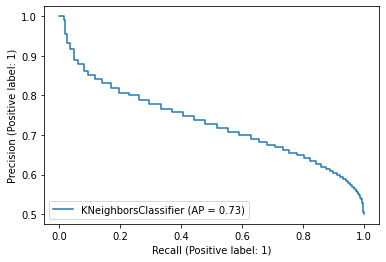

In [ ]:
mtr.plot_precision_recall_curve(model, Xtest_norm, ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


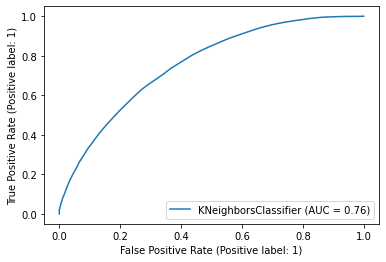

In [ ]:
mtr.plot_roc_curve(model, Xtest_norm, ytest)

# Support Vector Machines

O Support Vector Machine é um algoritmo de aprendizagem usado neste projeto para classificação, que transforma os dados numa base de dados de forma a traçar uma linha/hiperplano capaz de separar os dados em classes. Para trabalhar com SVMs, os dados devem ser normalizados tal como feito na fase inicial do processamento de dados, depois uma escolha de funções Kernel deve ser avaliada e testada para garantir o uso da que apresenta melhor separação.

In [ ]:
seed= 47

Xtrain_norm, Xtest_norm, ytrain, ytest = train_test_split(X, Y, train_size = 0.8, random_state = seed)

np.shape(Xtrain_norm)

(80000, 20)

In [ ]:
from sklearn.svm import SVC

Uma função Kernel é uma função matemática que manipulam a distribuição dos dados, fazendo-os distribuir-se ao longo de um maior número de dimensões espaciais, que idealmente permite uma equação linear ser capaz de separar satisfatoriamente a maioria dos dados pertencentes à sua respetiva classe e desta forma criar espaços multidimensionais que definam a respetiva classe de um novo dado introduzido. 
As funções de Kernel usadas neste projeto foram a ‘linear’ pois não só o seu uso é muito comum, mas também por ser usada para bases de dados com um grande número de features, ‘rbf’ também foi testada pois apresenta características semelhantes ao KNN e apresenta uma boa performance para classificações não lineares. 


In [ ]:
model = SVC(kernel='linear')

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.692046875, 0.690375)

In [ ]:
model = SVC(kernel='rbf')

model.fit(Xtrain2, ytrain2)

yval_pred = model.predict(Xval)
ytrain_pred = model.predict(Xtrain2)

(accuracy_score(ytrain2, ytrain_pred),accuracy_score(yval, yval_pred))

(0.70128125, 0.6929375)

In [ ]:
model_linear = SVC(kernel='linear')
model_rbf = SVC(kernel='rbf')

scores_linear = cross_val_score(model_linear, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_rbf = cross_val_score(model_rbf, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com o kernel linear:", scores_linear)
print("accuracies com o kernel rbf:", scores_rbf)
print("em média com o kernel linear:", np.mean(scores_linear))
print("em média com o kernel rbf:", np.mean(scores_rbf))

accuracies com o kernel linear: [0.691625 0.691625 0.6895   0.69275  0.6915  ]
accuracies com o kernel rbf: [0.691875 0.6955   0.69825  0.696125 0.69475 ]
em média com o kernel linear: 0.6914
em média com o kernel rbf: 0.6953


In [ ]:
stats.ttest_rel(scores_linear, scores_rbf)

Ttest_relResult(statistic=-2.8464973262707685, pvalue=0.04656043813595533)

De seguida, o segundo parâmetro alterado foi o parâmetro C, que permite otimizar a margem de classificação do hiperplano, isto é, com um número alto de C a SVM seria mais penalizada por classificar incorretamente um caso na base de dados e desta forma reduzir a margem de classificação, sendo mais rigorosa no processo. Com um valor mais reduzido deste parâmetro, a margem de classificação aumentaria e a probabilidade de classificações incorretas ocorrerem iria aumentar. Dependendo do objetivo do utilizador (caso queira incluir mais ou menos classificações incorretas) este parâmetro pode ser alterado pois em certos modelos o problema de negócio requere que certos casos sejam todos incluídos na classificação correta, mesmo que isto implique que a classificação de outros casos (de menos importância) seja afetada negativamente. 

In [ ]:
model_um = SVC(kernel='rbf', C = 1)
model_cem = SVC(kernel='rbf', C = 100)

scores_um = cross_val_score(model_um, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_cem = cross_val_score(model_cem, Xtrain_norm, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com o C = 1:", scores_um)
print("accuracies com o C = 100:", scores_cem)
print("em média com o C = 1:", np.mean(scores_um))
print("em média com o C = 100", np.mean(scores_cem))

accuracies com o C = 1: [0.691875 0.6955   0.69825  0.696125 0.694875]
accuracies com o C = 100: [0.687    0.68725  0.69325  0.687875 0.686625]
em média com o C = 1: 0.6953250000000001
em média com o C = 100 0.6884


Vantagens comuns de se usar SVMs são a sua rapidez em formular previsões, são capazes de se adaptar a vários tipos de base de dados e geram bons resultados com dados de alta dimensão. Pelo lado negativo não demonstram capacidade de reproduzir resultados para base de dados grandes, dependem de um afinamento cuidadoso do seu parâmetro C (que penaliza missclassifications a medida que o seu valor aumenta) e a forma de apresentação de resultados leva a um custo adicional de poder computacional pois depende de validação cruzada interna para obter uma interpretação probabilística direta. 

In [ ]:
stats.ttest_rel(scores_um, scores_cem)

Ttest_relResult(statistic=8.532169285326695, pvalue=0.0010355061126060172)

Como se pode verificar, a diferenca de resultados não é estatisticamente significativa.

In [ ]:
model = SVC(kernel = 'rbf', C = 1)

model.fit(Xtrain_norm, ytrain)

ytest_pred = model.predict(Xtest_norm)
ytrain_pred = model.predict(Xtrain_norm)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.6999375, 0.69425)

In [ ]:
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6400,3586
1,2529,7485


Temos uma especificidade de 6400 / (6400+3586) = 64.1%, aproximadamente. Apesar de não ser extremamente baixo, não parece ser um valor ideal num contexto médico, de vida ou de morte.
Mesmo assim é ligeiramente mais alto do que os modelos anteriores, mas continua sendo um valor inaceitável neste contexto. O modelo não tem sendibilidade suficiente à classe negativa para se poder considerar um bom modelo a aplicar num sistema de saúde.

In [ ]:
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))

0.7099834005216978
0.6760906873814471
0.7474535650089874


Os resultados são todos muito semelhantes aos que vimos no anteriormente, tanto no Naive Bayes como no KNN. 

A Precision Recall Curve mostra o tradeoff entre precisão e recall, quando se utiliza diferentes thresholds de classificação. Um valor superior da área debaixo do gráfico indica melhor performance, com recall e precisão altas.

A ROC curve indica o tradeoff entre true positive rate (sensibilidade) e false positive rate, em que valores da área debaixo do gráfico mais afastados de 0.5 indicam melhor performance.

Quanto ao valor da ROC AUC as mesmas observações (como nos modelos anteriores) aplicam-se perfeitamente a este modelo também, já que obtiveram valores praticamente iguais e o mesmo se pode afirmar da forma da precision-recall curve e do respetivo valor AP de 0.75.


C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


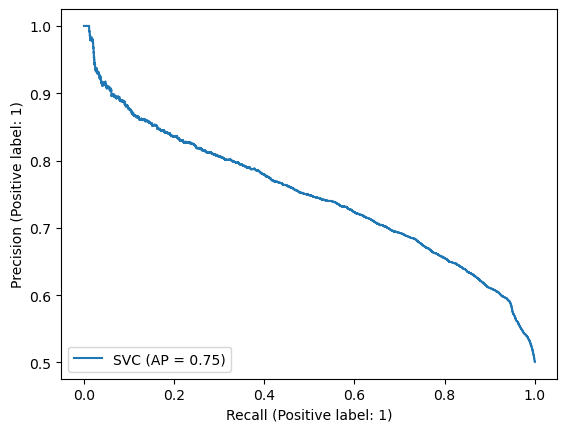

In [ ]:
mtr.plot_precision_recall_curve(model, Xtest_norm, ytest)

C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


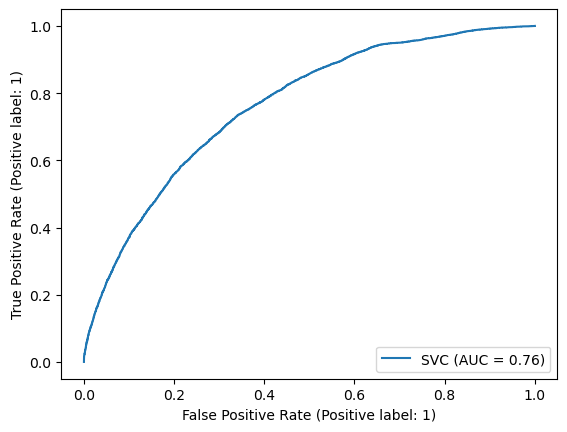

In [ ]:
mtr.plot_roc_curve(model, Xtest_norm, ytest)

# Decision Tree

Decision Trees têm uma estrutura relativamente simples, neste algoritmo vários pontos de decisão serão criados (chamados de “nós” da árvore) onde o caso específico a percorrer este trajeto ira seguir um caminho ou outro de acordo com a suas propriedades. Deste modo vários grupos serão criados (folhas) com características específicas onde todos os dados que se identificam no intervalo estabelecido serão classificados com a mesma classe. 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#count = df2.shape[0]

Para evitar overfitting e desequilíbrio dos dados as funções ShuffleSplit e StratifiedkFold foram usadas respetivamente. 

7
0.6965


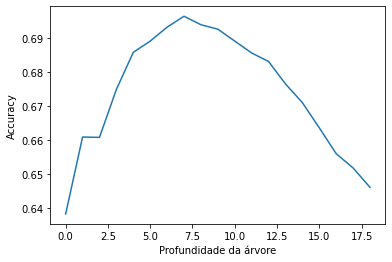

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import ShuffleSplit

L = []
for i in range(1,20):
    dtree = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(dtree, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))

plt.plot(L)
plt.xlabel('Profundidade da árvore')
plt.ylabel('Accuracy')
plt.show()

Para verficar qual a profundidade com maior accuracy um gráfico foi feito com várias medidas de profundidade (desde 1 a 20). Consegue-se deste modo visualizar que a profundidade da decision tree mais indicada será 7 (ou 8, ambos apresentam resultados extremamente semelhantes).
Na fase inicial do aumento de profundidade, é expectável que a accuracy aumente visto que um número reduzido de divisões/decisões pode não ser o suficiente para tomar a decisão correta no que diz respeito à classificação, mas após chegar a um teto (neste caso 7) o modelo é expectável que comece a sofre de overfitting, pelo que um número mínimo de casos deva ser estabelecido para garantir que não são criadas demasiadas folhas na árvore. 

119
0.6963


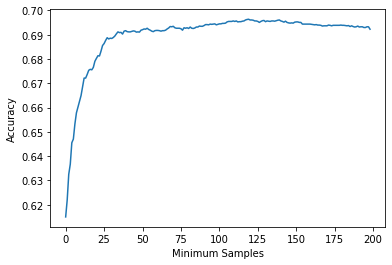

In [ ]:
L = []
for i in range(1,200):
    dtree = DecisionTreeClassifier(min_samples_leaf=i)
    scores = cross_val_score(dtree, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))

plt.plot(L)
plt.xlabel('Minimum Samples')
plt.ylabel('Accuracy')
plt.show()

Com este gráfico foi possível verificar que o número mínimo de casos para dividir a tree comeca a converger a partir dos 50, com uma diminuicao de taxa de aumento seguida de uma descida de accuracy. Deste modo foi possivel determinar que o minimo de casos ideal rondaria os 120 casos (com um maximo nos 122). 

In [ ]:
model_6 = DecisionTreeClassifier(max_depth=6)
model_7 = DecisionTreeClassifier(max_depth=7)
model_8 = DecisionTreeClassifier(max_depth=8)

scores_6 = cross_val_score(model_6, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_7 = cross_val_score(model_7, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
scores_8 = cross_val_score(model_8, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

print("accuracies com profundidade 6:", scores_6)
print("accuracies com profundidade 7:", scores_7)
print("accuracies com profundidade 8:", scores_8)

print("em média com profundidade 6:", np.mean(scores_6))
print("em média com profundidade 7:", np.mean(scores_7))
print("em média com profundidade 8:", np.mean(scores_8))

accuracies com profundidade 6: [0.683125 0.691625 0.690125 0.691375 0.68975 ]
accuracies com profundidade 7: [0.6855   0.693375 0.696    0.698875 0.69275 ]
accuracies com profundidade 8: [0.690625 0.693625 0.69675  0.703    0.697625]
em média com profundidade 6: 0.6892
em média com profundidade 7: 0.6933
em média com profundidade 8: 0.6963250000000001


Para confirmar os resultados obtidos, calculamos os cross validation scores para as profundidades vizinhas de 7 e obtivemos a média de cada fold.

In [ ]:
from scipy import stats

print(stats.ttest_rel(scores_6, scores_7))
print(stats.ttest_rel(scores_7, scores_8))

Ttest_relResult(statistic=-3.710540192904957, pvalue=0.020644290149049283)
Ttest_relResult(statistic=-2.8895651128160433, pvalue=0.04458238029244481)


De seguida calculamos o p-value dos pares para verificar se a mudança entre valores de accuracy era significativa ou não, sendo que a mudança menos significativa foi entre a profundidade 6 e 7.

O modelo com os parâmetros estabelecidos (max_depth =7 e min_samples_leaf = 120) foi criado, seguindo os resultados dos parâmetros testados anteriormente. 

In [ ]:
model_f = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)

model_f.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=120)

In [ ]:
ytest_pred = model_f.predict(Xtest)
ytrain_pred = model_f.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.6953875, 0.6939)

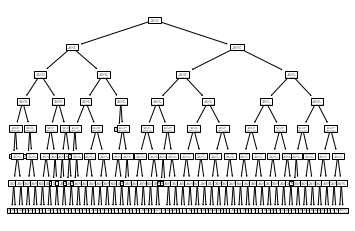

In [ ]:
dump = tree.plot_tree(model_f)

A árvore parece um pouco complexa, o que muitas vezes pode ser sugestivo de overfitting. Contudo, com o número elevado de variáveis a serem avaliadas para o modelo, a decision tree tem, como esperado, um número também elevado de ramos.
Com tantas dimensões a serem consideradas, é normal uma maior complexidade da árvore.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6701,3285
1,2618,7396


Temos uma especificidade de 6701 / (6701+3285) = 67.10%, aproximadamente. Mais uma vez, aquilo que foi dito para os outros modelos mantém-se também para este

In [ ]:
import sklearn.metrics as mtr
print('Accuracy ', mtr.f1_score(ytest,ytest_pred)) # F1_Score 
print('Precision ', mtr.precision_score(ytest,ytest_pred))
print('Recall ', mtr.recall_score(ytest,ytest_pred))

Accuracy  0.7147620198115487
Precision  0.6924445276659489
Recall  0.7385660075893749


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


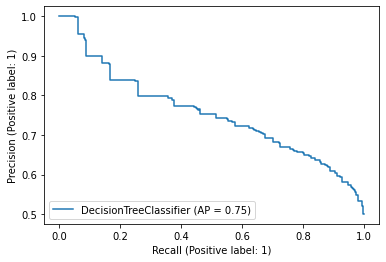

In [ ]:
mtr.plot_precision_recall_curve(model_f, Xtest, ytest)

A curva de recall-precision mostra a compensação entre precision e recall para diferentes limiares. Uma área alta sob a curva representa alta revocação e alta precisão, onde alta precisão está relacionada a uma baixa taxa de falsos positivos e alta recall está relacionada a uma baixa taxa de falsos negativos. Neste caso o valor de AP (Average Precision) resume o gráfico como a média ponderada de precisões alcançadas em cada limiar, com o aumento na recuperação do limite anterior usado como o peso, um valor de AP de 0.75 neste gráfico é considerado aceitável, mas não suficiente.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


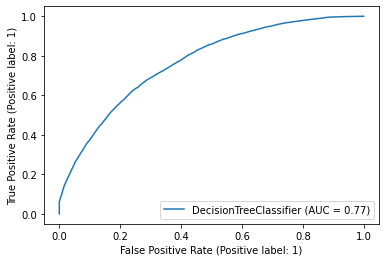

In [ ]:
mtr.plot_roc_curve(model_f, Xtest, ytest)

Uma curva ROC (Curva aracterística de Operação do Receptor) é um gráfico que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. Esta curva demonstra a relação de dois parâmetros a taxa de True Positives e False Positives. Com o valor desejado sendo o mais próximo possível de 1, a ROC obtida não é perfeita, mas pode ser considerada mais do que aceitável. Uma área sob a curva (AUC) de 0.77 significa que o desempenho do modelo em distinguir entre as classes positivas e negativas é satisfatório. 

Feature: 0, Score: 0.00454
Feature: 1, Score: 0.00266
Feature: 2, Score: 0.12185
Feature: 3, Score: 0.48539
Feature: 4, Score: 0.00188
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00463
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01435
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00271
Feature: 15, Score: 0.21273
Feature: 16, Score: 0.03345
Feature: 17, Score: 0.00472
Feature: 18, Score: 0.01058
Feature: 19, Score: 0.10051


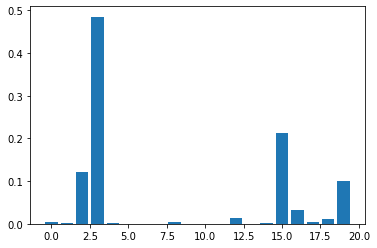

In [ ]:
from matplotlib import pyplot
importance = model_f.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

O atributo 'feature_importances_' são calculadas como a média e o desvio padrão do acúmulo da diminuição de impurezas dentro de cada árvore. Em suma, esta função atribui uma pontuação a recursos de entrada com base em quão útil eles são na previsão de uma variável de destino, com os que apresentam valores maiores sendo mais úteis e vice-versa.
De acordo com o gráfico de features, a que mais se destaca é claramente a 'EDAD' seguida de 'CLASSIFICACION_FINAL'.

# Random Forest

Random Forest utiliza ensembles das árvores de decisão para fazer previsões, utilizando uma amostra aleatória do nosso dataset, criando um conjunto de árvores de decisão nos subconjuntos. Deste modo, iremos ajustar os hiperparâmentros a fim de obter um número mais elevado de árvores de decisão usando diferentes critérios, iremos obter uma melhor performance do random forest, porque estaremos essencialmente a aumentar a nossa prediction accuracy.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Na aplicação do modelo de Random Forest, iremos usar diferentes valores para os vários hiperparâmetros do modelo, que irão afetar os resultados finais. 

O hiperparâmetro que vamos afinar é o número de estimadores base (árvore de decisão) que vão constituir o ensemble final. Para isso, decidimos criar um loop que testa por cross validation a accuracy que conseguimos com cada valor diferente do hiperparâmetro, para depois representar gráficamente e ver se conseguimos diferenças estatísticamente significativas.

Primeiramente, iremos analisar com valores entre 1 e 35 para os valores do hiperparâmentro.

13
0.7039


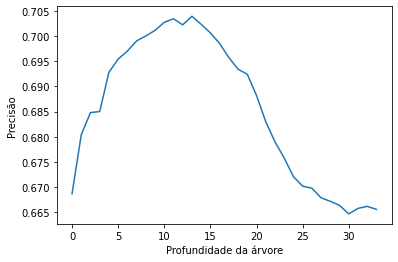

In [24]:
import matplotlib.pyplot as plt

L = []
Score_list = []
for i in range(1,35):
    clf = RandomForestClassifier(max_depth=i, random_state= 47)
    scores = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    Score_list.append(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))

plt.plot(L)
plt.xlabel('Profundidade da árvore')
plt.ylabel('Precisão')
plt.show()

Como podemos verificar no grafico acima, a profundidade ideal para a random forest seria 14, a partir deste valor, a accuracy (o nome do eixo no gráfico é uma gralha) começa a baixar significativamente. 

Uma aplicação direta do algoritmo de Random Decision Tree com o criterion de 'gini' e sem profundidade inicial permite-nos obter uma accuracy de aproximadamente 70%, mas talvez aumentando a profundidade iria ajudar a performance do modelo. 

In [27]:
np.mean(Score_list[13])

0.703875

In [36]:
from scipy import stats

print(stats.ttest_rel(Score_list[13], Score_list[15]))
print(stats.ttest_rel(Score_list[13], Score_list[14]))
print(stats.ttest_rel(Score_list[13], Score_list[12]))
print(stats.ttest_rel(Score_list[13], Score_list[11]))
print(stats.ttest_rel(Score_list[13], Score_list[10]))
print(stats.ttest_rel(Score_list[13], Score_list[9]))
print(stats.ttest_rel(Score_list[13], Score_list[8]))

Ttest_relResult(statistic=4.220320526345881, pvalue=0.013474127314161907)
Ttest_relResult(statistic=2.443531354627953, pvalue=0.07093786106768783)
Ttest_relResult(statistic=2.370289611218706, pvalue=0.07679670596098694)
Ttest_relResult(statistic=0.49288340522276824, pvalue=0.6479263512193005)
Ttest_relResult(statistic=0.9502621934663923, pvalue=0.39578902733936944)
Ttest_relResult(statistic=2.385680207916865, pvalue=0.07552140114157006)
Ttest_relResult(statistic=4.002030024186445, pvalue=0.016102881890629347)


Em termos de accuracy, pode-se verificar que só é estatisticamente significativo face aos valores inferiores a 9 e superiores a 16.

Iremos repetir o processo realizado anteriormente, mas desta vez, experimentando valores entre 90 e 130.

In [ ]:
L = []
Score_list = []
for i in range(90,130):
    clf = RandomForestClassifier(n_estimators = i, random_state= 47, max_depth = 14)
    scores = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    Score_list.append(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))


plt.plot(L)
plt.xlim([90, 130])
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
plt.show()

In [54]:
L[30]

0.7042

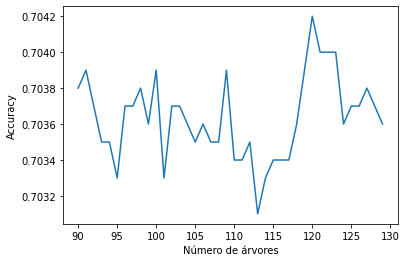

In [52]:
plt.plot(L)
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
#plt.xticks(range(0, 41), range(90, 131))
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [90, 95, 100, 105, 110, 115, 120, 125, 130])
plt.show()

In [56]:
Score_list[35]

array([0.697125, 0.703625, 0.70225 , 0.709   , 0.7075  ])

In [ ]:
pu = Score_list[35:]
pu

In [71]:
np.mean(Score_list[22])

0.703125

In [72]:
from scipy import stats

print(stats.ttest_rel(Score_list[30], Score_list[18]))
print(stats.ttest_rel(Score_list[30], Score_list[22]))

Ttest_relResult(statistic=0.2383656473113874, pvalue=0.8233108477447533)
Ttest_relResult(statistic=2.4354363293702606, pvalue=0.0715598113218212)


Obtivemos uma accuracy ligeiramente superior com 120 estimadores e apesar de não se ter demonstrado uma diferença estatísticamente significativa vamos manter este valor.   

Seguidamente, avançamos para o treino do modelo, com o dataset de treino, seguido do teste, para obter as métricas de avaliação do modelo.

In [73]:
# fazer fit com os parametros ótimos e o data set todo
model = RandomForestClassifier(n_estimators = 120, max_depth = 14)

model.fit(Xtrain, ytrain)

ytest_pred = model.predict(Xtest)
ytrain_pred = model.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

RandomForestClassifier(max_depth=14, n_estimators=120)

In [74]:
ytest_pred = model.predict(Xtest)
ytrain_pred = model.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.7749, 0.70405)

De acordo com os valores obtidos na célula em cima, obtivemos uma accuracy de treino bastante superior, indicando assim overfitting.

Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6708,3278
1,2641,7373


Temos uma especificidade de 6708 / (6708+3278) = 67.17%, aproximadamente. Novamente, não é um valor muito alto para um contexto médico de vida ou de morte, em que é fundamental ter a certeza que não negligenciamos pacientes em risco, para os quais as consequências seriam muito graves.

Está apresentado no código a baixo, o cálculo de outras métricas de avaliação, como o f1 score, a precision, e a recall.

In [77]:
import sklearn.metrics as mtr
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))

0.7135736752963948
0.6922354708478077
0.7362692230876773


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


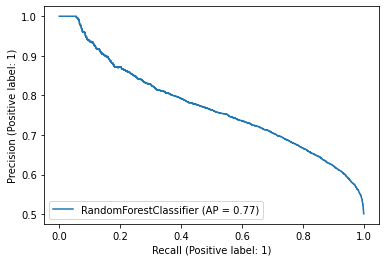

In [78]:
mtr.plot_precision_recall_curve(model, Xtest, ytest)

O valor de Average Precision de 0.77 indica que o modelo consegue ter uma precision e recall satisfatória.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


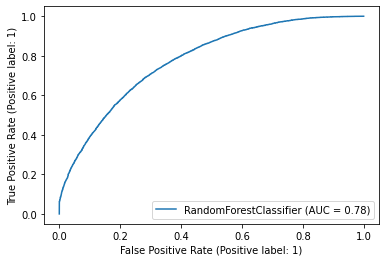

In [79]:
mtr.plot_roc_curve(model, Xtest, ytest)

O mesmo se pode dizer sobre o valor obtido como Area Under the Curve (0.78) na curva receiver operating characteristic.

Por fim, apresentamos um bar plot com as feature importance.

Feature: 0, Score: 0.02141
Feature: 1, Score: 0.02284
Feature: 2, Score: 0.09217
Feature: 3, Score: 0.32152
Feature: 4, Score: 0.02617
Feature: 5, Score: 0.01021
Feature: 6, Score: 0.00723
Feature: 7, Score: 0.00948
Feature: 8, Score: 0.03434
Feature: 9, Score: 0.01240
Feature: 10, Score: 0.01140
Feature: 11, Score: 0.01774
Feature: 12, Score: 0.01586
Feature: 13, Score: 0.01303
Feature: 14, Score: 0.02220
Feature: 15, Score: 0.17731
Feature: 16, Score: 0.02796
Feature: 17, Score: 0.08126
Feature: 18, Score: 0.02003
Feature: 19, Score: 0.05546


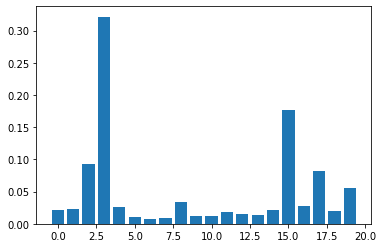

In [80]:
from matplotlib import pyplot
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

O atributo 'feature_importances_' são calculadas como a média e o desvio padrão do acúmulo da diminuição de impurezas dentro de cada árvore. Esta função atribui uma pontuação a recursos de entrada com base em quão útil eles são na previsão de uma variável de destino, com os que apresentam valores maiores sendo mais úteis e vice-versa. De acordo com o gráfico de features, a que mais se destaca é claramente a 'EDAD' seguida de 'CLASSIFICACION_FINAL'.

# Bagging 

O classificador Bagging, foi utilizado para ajustar cada classificador de base em subconjuntos aleatórios do conjunto de dados originais, por amostragem com recurso à técnica de bootstrapping. Em seguida, agrega as previsões individuais para formar uma previsão final.Foi utilizado de forma que a reduzir a variância das previsões feitas pelo estimador (árvore de decisão), introduzindo aleatoriedade no procedimento de construção e, em seguida, transformando-o num conjunto.  

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.ensemble import BaggingClassifier

Para aplicação do modelo de Bagging, temos de escolher os valores para os vários hiperparâmetros do modelo, que irão certamente afectar os resultados finais.

Nós escolhemos iniciar o processo utilizando como modelo base a árvore de decisão com os hiperparâmetros a que tínhamos chegado anteriormente (profundidade máxima de 7 e minimo de amostras por ramo de 120) para criar este ensemble.

O hiperparâmetro que vamos afinar é o número de estimadores base (árvore de decisão) que vão constituir o ensemble final. Para isso, decidimos criar um loop que testa por cross validation a accuracy que conseguimos com cada valor diferente do hiperparâmetro, para depois representar gráficamente e ver se conseguimos diferenças estatísticamente significativas.

In [ ]:
L = []
Score_list = []
for i in range(90,130):
    base_tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)
    bag = BaggingClassifier(base_tree, n_estimators=i,random_state=47)
    scores = cross_val_score(bag, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    Score_list.append(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))


plt.plot(L)
plt.xlim([90, 130]) # mal, mas em baixo está bem.
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
plt.show()

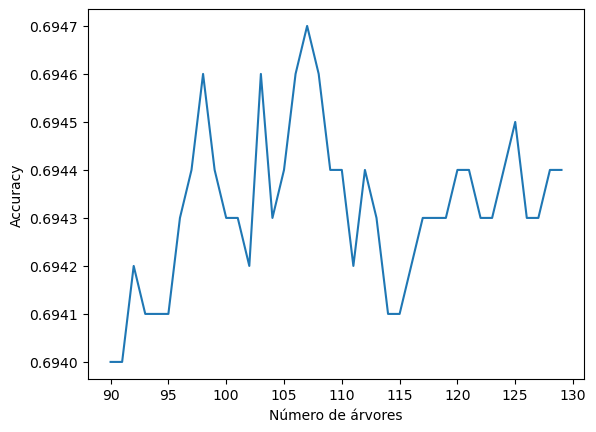

In [ ]:
plt.plot(L)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [90, 95, 100, 105, 110, 115, 120, 125, 130])
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
plt.show()

Inicialmente, experimentámos valores entre 90 e 130. Visualizando o gráfico, pode-se constatar que temos um pico para um valor de 107, atingindo assim uma accuracy de quase 0.70.

No entanto, se analisarmos o gráfico com atenção, vemos que o intervalo de valores que obtemos com os diferentes números de árvores a compôr o ensemble é muito baixo. Apenas varia entre 0.6940 e 0.6947.

Precisamos de averiguar se as diferenças são estatísticamente significativas.

Procedemos ao teste t emparelhado, na célula abaixo, e vemos que o máximo que atingimos não corresponde a uma diferença estatísticamente significativa face ao segundo valor mais alto (quando o número de árvores é 103), nem tampouco face ao valor mais baixo de todos (quando o número de árvores é 90).

Não há diferenças estatísticamente significativas em termos de accuracy para nenhum destes valores do hiperparâmetro em questão.

In [ ]:
from scipy import stats

print(stats.ttest_rel(Score_list[13], Score_list[17]))
print(stats.ttest_rel(Score_list[24], Score_list[17]))
print(stats.ttest_rel(Score_list[1], Score_list[17]))

Ttest_relResult(statistic=-0.8451542547285381, pvalue=0.4456143882486019)
Ttest_relResult(statistic=-1.9756583222946076, pvalue=0.11939340407966317)
Ttest_relResult(statistic=-2.140819064524215, pvalue=0.09899669033084099)


Como não encontrámos valores estatísticamente significativos, vamos repetir o procedimento anterior, desta vez para valores entre o 50 e o 90.

37
0.6943


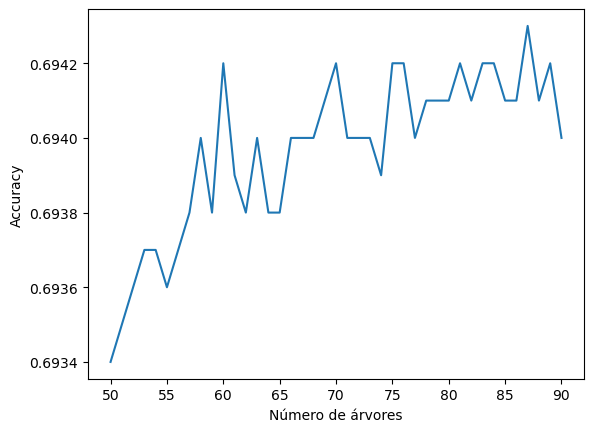

In [ ]:
L = []
Score_list = []
for i in range(50,91):
    base_tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)
    bag = BaggingClassifier(base_tree, n_estimators=i,random_state=47)
    scores = cross_val_score(bag, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    Score_list.append(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))


plt.plot(L)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [50, 55, 60, 65, 70, 75, 80, 85, 90])
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
plt.show()

No gráfico constatamos que é atingido um valor máximo da accuracy para um número de árvores de 87. É, no entanto, um valor ligeiramente inferior ao máximo que tínhamos atingido antes (0.6943, face aos 0.6947 atingidos anteriormente).

Precisamos de averiguar a significância estatística destes resultados, novamente.

In [ ]:
np.mean(Score_list[40])

0.6940250000000001

Com o código abaixo (para o teste t emparelhado), vemos que o pico de accuracy que atingimos, com um número de árvores de 87, apenas tem uma diferença estatísticamente significativa face à accuracy com 50 árvores.

In [ ]:
from scipy import stats

print(stats.ttest_rel(Score_list[40], Score_list[37]))
print(stats.ttest_rel(Score_list[33], Score_list[37]))
print(stats.ttest_rel(Score_list[34], Score_list[37]))
print(stats.ttest_rel(Score_list[35], Score_list[37]))
print(stats.ttest_rel(Score_list[36], Score_list[37]))
print(stats.ttest_rel(Score_list[0], Score_list[37]))

Ttest_relResult(statistic=-1.3187609467913803, pvalue=0.2576835219981942)
Ttest_relResult(statistic=-0.2398082300931654, pvalue=0.822266618335719)
Ttest_relResult(statistic=-0.5345224838247358, pvalue=0.6213082950375683)
Ttest_relResult(statistic=-0.929981109950373, pvalue=0.40502331430914396)
Ttest_relResult(statistic=-2.449489742783178, pvalue=0.07048399691021993)
Ttest_relResult(statistic=-3.8374620062850786, pvalue=0.018499629540953116)


Voltamos então ao nosso procedimento de fine tuning do número de árvores, desta vez experimentando valores entre 130 e 170.

In [ ]:
L = []
Score_list = []
for i in range(130,170):
    base_tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)
    bag = BaggingClassifier(base_tree, n_estimators=i,random_state=47)
    scores = cross_val_score(bag, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))
    media = np.mean(scores)
    Score_list.append(scores)
    L.append(round(media,4))

print(L.index(max(L)))
print(max(L))

Desta vez, o máximo da accuracy foi para um número de árvores de 157. Mais uma vez, vemos que o intervalo de valores da accuracy é bastante curto. Mais uma vez, vamos averiguar a significância estatística destes resultados através de um teste t emparelhado.

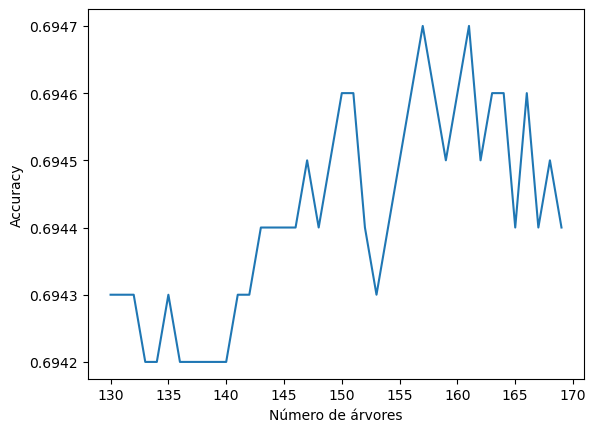

In [ ]:
plt.plot(L)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [130, 135, 140, 145, 150, 155, 160, 165, 170])
plt.xlabel('Número de árvores')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
np.mean(Score_list[17])

0.6945250000000001

Com o teste t emparelhado, vemos que o pico que atingimos não é significativamente diferentes dos valores atingidos com 147 árvores, mas já o é quando o valor é de 145, se o nível de significância for de 5%.

Face a estes resultados, decidimos optar por um valor de 147 para o hiperparâmetro, pois não há necessidade criar um modelo mais complexo, com mais árvores, sem diferenças estatisticamente significativas de performance entre eles.

In [ ]:
print(stats.ttest_rel(Score_list[15], Score_list[27]))
print(stats.ttest_rel(Score_list[17], Score_list[27]))
print(stats.ttest_rel(Score_list[20], Score_list[27]))
print(stats.ttest_rel(Score_list[23], Score_list[27]))
print(stats.ttest_rel(Score_list[28], Score_list[27]))
print(stats.ttest_rel(Score_list[29], Score_list[27]))
print(stats.ttest_rel(Score_list[30], Score_list[27]))
print(stats.ttest_rel(Score_list[0], Score_list[27]))

Ttest_relResult(statistic=-3.999999999999506, pvalue=0.01613008990009916)
Ttest_relResult(statistic=-1.509658824848082, pvalue=0.2056399589507225)
Ttest_relResult(statistic=-0.40824829046380634, pvalue=0.7040000000000384)
Ttest_relResult(statistic=-4.185110693298141, pvalue=0.01386103929675704)
Ttest_relResult(statistic=-2.057983021710464, pvalue=0.1087009513248794)
Ttest_relResult(statistic=-1.723280873710592, pvalue=0.15993479883743394)
Ttest_relResult(statistic=-0.7844645405523343, pvalue=0.476620667273052)
Ttest_relResult(statistic=-3.028960741674112, pvalue=0.03882011643531958)


Avançamos para o treino do modelo, com o dataset de treino, seguido do teste, para obter as métricas de avaliação do modelo.

In [ ]:
base_tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)
bag = BaggingClassifier(base_tree, n_estimators=147,random_state=47)

bag.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        min_samples_leaf=120),
                  n_estimators=147, random_state=47)

In [ ]:
ytest_pred = bag.predict(Xtest)
ytrain_pred = bag.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.6987, 0.69805)

Obtivemos uma accuracy de treino ligeiramente superior, o que pode, teoricamente, ser um indício de overfitting. No entanto, a diferença não é muito grande, portanto julgamos não poder afirmar isso com grande certeza.

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6858,3128
1,2911,7103


Temos uma especificidade de 6858 / (6858+3128) = 68.68 %, aproximadamente. Mais uma vez, não é um valor muito alto para um contexto médico de vida ou de morte, em que precisamos de ter a certeza que não negligenciamos pacientes em risco, para os quais as consequências disso seriam muito elevadas.

Procedemos ao cálculo de outras métricas de avaliação, como a precision, a recall e o f1 score.

In [ ]:
import sklearn.metrics as mtr
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))

0.701704124475179
0.6942625354315316
0.7093069702416617


C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


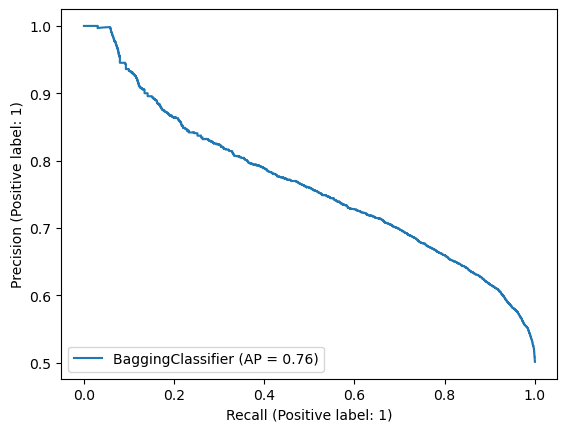

In [ ]:
mtr.plot_precision_recall_curve(bag, Xtest, ytest)

C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


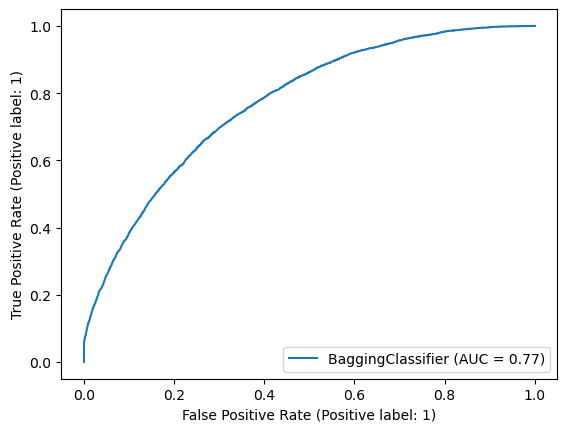

In [ ]:
mtr.plot_roc_curve(bag, Xtest, ytest)

A curva ROC, apresenta um valor de AUC igual a 0.77, significando que o modelo apresenta alguma capacidade preditiva e de distinção das classes. Apesar disso, o valor não é muito alto, sobretudo considerando o contexto médico.

# AdaBoost

Adaptibe Boosting este modelo ajuda a reduzir o erro de qualquer classificador (Decision Trees ou Support Vector Machines), ao transformar sequencialmente classificadores fracos em classificadores fortes. Pode ser alcançado ajustando sequencialmente os pesos dos hiperparâmetros. 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import ShuffleSplit
import numpy as np

Na aplicação deste modelo AdaBoost iremos fazer variar os valores para os hiperparâmetros dos modelos, que irão seguramente afetar os resultados finais.

Iniciou-se o processo utilizando como modelo base a árvore de decisão com os hiperparâmetros que obtivemos anteriormente (profundidade máxima de 7 e minimo de amostras por ramo de 120) para criar este ensemble.

Para por em prática este modelo AdaBoost,iremos testar os hiperparâmetros, fazendo variar o múmero máximo de estimadores, aumentando sucessivamente os pesos começando em 100 passando para 1000 e por fim para 10 000. 

Serão testados por cross validation a accuracy que conseguimos obter com cada valor diferente do hiperparâmetro, após isso, será representado gráficamente e verificar se conseguimos diferenças estatísticamente significativas.   

Primeiramente, iremos usar o modelo base mais simples AdaBoost default, em que o seu classificador são as árvores de decisão, para verificar as melhorias que o boosting irá fazer.   

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=47)
scores = cross_val_score(model, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

In [ ]:
print("accuracies com o AdaBoost default: ", scores)
print("em média com o AdaBoost default:", np.mean(scores))

accuracies com o AdaBoost default:  [0.697625 0.701375 0.696625 0.700625 0.696875]
em média com o AdaBoost default: 0.698625


Inicialmente obteve-se uma accuracy em média com o AdaBoost default de 69.86%, este valor é baixo, por isso, é necessário averiguar se as diferenças são estatísticamente significativas. 

Com o código a baixo, iremos repetir o processo feito anteriomente, contudo, iremos utilizar como modelo base a árvore de decisão com os hiperparâmetros a que tínhamos chegado anteriormente (profundidade máxima de 7 e minimo de amostras por ramo de 120) para criar este ensemble.

In [ ]:
base_tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 120)
model = AdaBoostClassifier(base_estimator = base_tree, n_estimators=100, random_state=47)
scores = cross_val_score(model, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

In [ ]:
print("accuracies com o AdaBoost e a nossa árvore: ", scores)
print("em média com o AdaBoost e a nossa árvore:", np.mean(scores))

accuracies com o AdaBoost e a nossa árvore:  [0.682125 0.682    0.681375 0.687    0.68425 ]
em média com o AdaBoost e a nossa árvore: 0.68335


In [ ]:
score_default = np.array([0.697625, 0.701375, 0.696625, 0.700625, 0.696875])
score_arvore = np.array([0.682125, 0.682, 0.681375, 0.687, 0.68425 ])

In [ ]:
print(stats.ttest_rel(score_default, score_arvore))

Ttest_relResult(statistic=13.243549007793465, pvalue=0.00018784682234430867)


Procedemos à verificação da significância estatística e conclui-se que ao incluir os 100 estimadores verifica-se que é estatísticamente significativo. Apresenta também uma accuracy de 68.34% apróximadamente.   

Nos comandos seguintes, iremos continuar a iterar o processo feito anteriormente, mas com um parametro aumentado para 1 000 estimadores.
Vamos verificar se é justificável aumentar parâmetros para valores muito elevados.

In [ ]:
model = AdaBoostClassifier(n_estimators=1000, random_state=47)
scores_mil = cross_val_score(model, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

In [ ]:
print("accuracies com o AdaBoost 1000: ", scores_mil)
print("em média com o AdaBoost 1000:", np.mean(scores_mil))

accuracies com o AdaBoost 1000:  [0.696625 0.701375 0.69825  0.70475  0.69625 ]
em média com o AdaBoost 1000: 0.69945


In [ ]:
scores_mil = np.array([0.696625, 0.701375, 0.69825, 0.70475, 0.69625])

In [ ]:
print(stats.ttest_rel(score_default, scores))

Ttest_relResult(statistic=-1.2231995660807664, pvalue=0.2883873644532394)


Com o teste t emparelhado, vemos que os resultados não são estatísticamente significativos, com o aumento do hiperparâmetro resultou um aumento da accuracy para 69.95%. 

Este aumento do número de estimadores não apresentou resultados estatísticamente significativos, no entanto, iremos aumentar os parâmetros mais uma vez, para 10 000 estimadores. 

In [ ]:
model = AdaBoostClassifier(n_estimators=10000, random_state=47)
scores = cross_val_score(model, Xtrain, ytrain, cv = ShuffleSplit(n_splits = 5, random_state = 47))

In [ ]:
print("accuracies com o AdaBoost 10 000: ", scores)
print("em média com o AdaBoost 10 000:", np.mean(scores))

accuracies com o AdaBoost 10 000:  [0.696875 0.7015   0.697875 0.70475  0.69725 ]
em média com o AdaBoost 10 000: 0.69965


In [ ]:
print(stats.ttest_rel(score_default, scores))

Ttest_relResult(statistic=-1.2231995660807664, pvalue=0.2883873644532394)


Como seria espectável, para o peso mais elevado obtemos uma accuracy mais elevada, contudo, mantém-se a inexistência de significância estatística com o aumento dos parâmetros. Levando a concluir que, com a comparação do AdaBoost Default com as restantes configurações, em que aumentamos o número de estimadores, verificamos que nunca mais apresentaram diferenças significativas. Portanto, não é justificável ter um modelo mais complexo, o modelo inicial consegue obter resultados semelhantes sendo estatísticamente significativos. 

Escolhidos os hiperparâmetros, vamos agora avançar para o treino do modelo com todo o dataset de treino, testar a sua performance com o dataset de teste e calcular algumas medidas para a sua avaliação.

In [ ]:
model = AdaBoostClassifier(n_estimators=100, random_state=47)

Seguidamente, vamos ajustar o nosso modelo ao nosso conjunto de dados de treino.

In [ ]:
model.fit(Xtrain, ytrain)

AdaBoostClassifier(n_estimators=100, random_state=47)

A próxima etapa será avaliar se o nosso modelo é bom ou mau para as previsões. 

In [ ]:
ytest_pred = model.predict(Xtest)
ytrain_pred = model.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.6979, 0.699)

Obtivemos uma accuracy maior com o dataset de teste do que o de treino, significando que não aprensenta indícios de overfitting. 

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6734,3252
1,2768,7246


Apresenta uma especificidade de 67.43% aproximadamente.Apesar de não ser extremamente baixo, não parece ser um valor ideal num contexto médico, de vida ou de morte. No entanto, é ligeiramente mais baixo do que no Bagging. 

Procedemos ao cálculo de outras métricas de avaaliação, como o f1 score, a
precision e a recall.

In [ ]:
import sklearn.metrics as mtr
print(mtr.f1_score(ytest,ytest_pred))
print(mtr.precision_score(ytest,ytest_pred))
print(mtr.recall_score(ytest,ytest_pred))

0.7065132605304213
0.6902267098494952
0.7235869782304774


De seguida, verificamos a Precision Recall curve, que nos mostra a relação entre o modelo e o conjunto de dados e teste.

C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


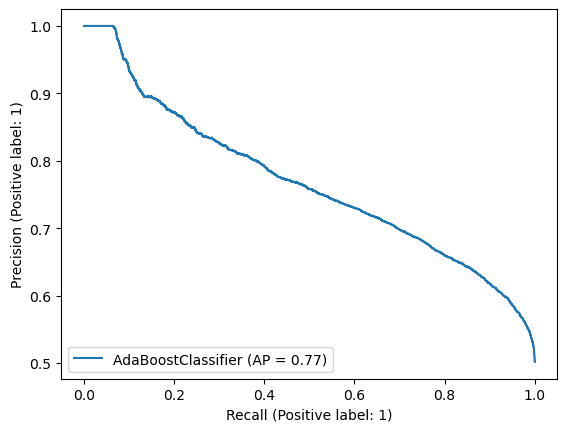

In [ ]:
mtr.plot_precision_recall_curve(model, Xtest, ytest)

Verificamos que o valor de AP é relativamente elevado (AP=0.77), este varia entre 0 e 1, quanto mais próximo de 1, melhor se torna, indicando que o modelo produz não produz muitos falsos positivos. 

Por fim, a cruva ROC, apresenta algumas semelhanças com a curva precision recall. No entanto, esta apresenta a taxa True Positive em relação à taxa True Negative também classifica as previsões por confiança. 

C:\Users\cdrib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


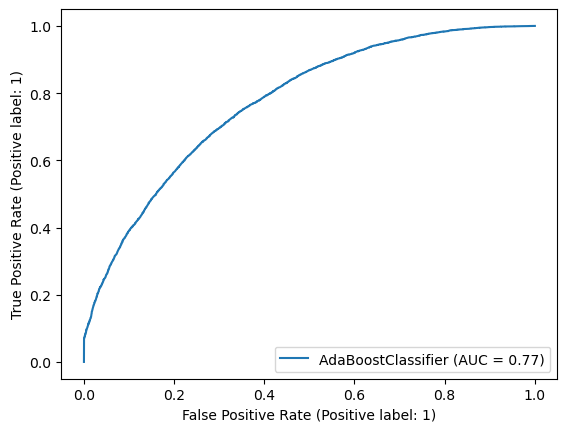

In [ ]:
mtr.plot_roc_curve(model, Xtest, ytest)

Neste caso, a AUC apresenta um valor de 0.77, significando que o modelo apresenta alguma capacidade preditiva. 

# Neural Network

Uma Rede Neuronal como o próprio nome indica é um processo de machine learning que tenta replicar o comportamento do cérebro humano. Ela é constituída por várias variáveis como por exemplo o número de camadas, número de neurónios, a função de ativação etc. que cada um tem um efeito na performance da rede, quer seja por fazê-la mais rápida, mais eficaz ou atingir melhores resultados. 
Primeiro iremos por começar por testar como diferentes funções de ativação afetam os resultados de uma rede com uma camada com 100 neurónios. O número de iterações foi aumentado para 1000 para ajudar a garantir que a rede não parasse de treinar antes de convergir para um valor satisfatoriamente próximo do que seria o seu máximo. Caso os resultados não estivessem a convergir durante 10 iterações o parâmetro n_iter_no_change faria com que a rede parasse de correr pois estaria a desperdiçar tempo e poder computacional. 


Aplicando Stratified k-Fold cross-validation:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(100,),
                    max_iter=1000,verbose=0,
                   activation='relu')

scores = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o relu:", scores )
print("em média com o relu:", np.mean(scores))

accuracies com o relu: [0.697375 0.70225  0.696125 0.704125 0.701125]
em média com o relu: 0.7001999999999999


A primeira função de ativação usada foi a ‘ReLU’ pois é uma das mais comuns, esta apresenta bons resultados em menos tempo do que outras funções devido à sua característica de ‘desligar’ todos os neurónios com valor negativo, isto ajuda a rede a começar a filtrar os neurónios mais importantes para previsão do modelo e apenas usar os que atingem melhores resultados, acabando por não treinar os que têm valor negativo. No caso da função de ativação ‘tanh’, esta demonstra maiores atualizações dos pesos nos neurónios no que resulta em grandes aumentos de aprendizagem por iteração. Por último a função de ativação ‘logistic’ apresenta bons resultados em base de dados normalizadas e exibe um gradiente suave, evitando assim grandes saltos nos valores de atualização dos pesos, o que dependendo do modelo pode vir a ser benéfico. 

Experimentando diferentes activation functions:

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(100,),
                    max_iter=1000,verbose=0,
                   activation='logistic')

scores2 = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o logistic:", scores2 )
print("em média com o logistic:", np.mean(scores2))

accuracies com o logistic: [0.69125  0.6905   0.690625 0.705    0.703125]
em média com o logistic: 0.6961


In [ ]:
stats.ttest_rel(scores, scores2)

Ttest_relResult(statistic=-1.5102787906981738, pvalue=0.2054894095934485)

De acordo com o valor de pvalue a activation function apresenta uma descida de precisao suficientemente alta para ser considerado inferior à activation function 'ReLU'.

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(100,),
                    max_iter=1000,verbose=0,
                   activation='tanh')

scores3 = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o tanh:", scores3 )
print("em média com o tanh:", np.mean(scores3))

accuracies com o tanh: [0.7045   0.702625 0.697625 0.703875 0.7025  ]
em média com o tanh: 0.7022250000000001


In [ ]:
stats.ttest_rel(scores, scores3)

Ttest_relResult(statistic=-2.692957368044781, pvalue=0.05449063859930267)

Como podemos verificar, alterar as activation functions afeta o grau de precisão, mas não significativamente, visto que todas rondam entre os 69-71%.
Considerando que por norma a activation function 'ReLU' apresenta resultados mais rapidamente do que a 'tanh' (de acordo com o site: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) e verificando que apesar de a 'tanh' obter resultados ligeiramente maiores, estes não são estatisticamente significativos, iremos proceder com o uso de 'ReLU'.

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(50,50,),
                    max_iter=1000,verbose=0,
                   activation='relu')

scores4 = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o relu:", scores4 )
print("em média com o relu:", np.mean(scores4))

accuracies com o relu: [0.691125 0.694875 0.695875 0.701    0.695625]
em média com o relu: 0.6957000000000001


In [ ]:
stats.ttest_rel(scores, scores4)

Ttest_relResult(statistic=-1.3512480646200467, pvalue=0.24798508354214066)

Aumentar o numero de camadas parece fazer obter uma mudanca significativa, mas neste caso o resultado foi negativo, talvez aumentar o numero de neuronios ajude:

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(100,100,),
                    max_iter=1000,verbose=0,
                   activation='relu')

scores5 = cross_val_score(clf, Xtrain2, ytrain2, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o relu:", scores5 )
print("em média com o relu:", np.mean(scores5))

accuracies com o relu: [0.6634375  0.67796875 0.664375   0.66453125 0.678125  ]
em média com o relu: 0.6696875


In [ ]:
stats.ttest_rel(scores, scores5)

Ttest_relResult(statistic=5.611082352201729, pvalue=0.004956526017248484)

Aumentar o numero de neuronios nao demonstrou ser uma boa opcao neste caso, de acordo com o pvalue a diferença foi significativa a favor de não  aumentar. Visto que depois de mudar varios hyperparameteros nenhum deles apresentou um aumento de performance significativo, o modelo inicial vai ser o avaliado, pois apresenta performance relativa alta e duração baixa. 

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(50,),
                    max_iter=1000,verbose=0,
                   activation='relu')

scores6 = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o relu:", scores6 )
print("em média com o relu:", np.mean(scores6))

accuracies com o relu: [0.703125 0.70375  0.69875  0.701    0.701   ]
em média com o relu: 0.701525


In [ ]:
stats.ttest_rel(scores, scores6)

Ttest_relResult(statistic=-2.2986133310949373, pvalue=0.08306566155310215)

Uma redução do número de neurônios (para 50) provou ser mais efficaz (do que 100) e segundo o pvalue a diferenca entre os valores é considerada grande o suficiente para adoptar esta nova arquitetura. Mas será que reduzir ainda mais irá reproduzir resultados ainda melhores? De seguida experimentamos reduzir o número de neurônios para 25: 

In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(25,),
                    max_iter=1000,verbose=0,
                   activation='relu')

scores7 = cross_val_score(clf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=5, random_state= 47))

print("accuracies com o relu:", scores7 )
print("em média com o relu:", np.mean(scores7))

accuracies com o relu: [0.702625 0.697625 0.699875 0.704375 0.697875]
em média com o relu: 0.700475


In [ ]:
stats.ttest_rel(scores, scores7)

Ttest_relResult(statistic=-2.9545857042838266, pvalue=0.04177849030185566)

Visto que o pvalue é ligeiramente abaixo de 0.5 não podemos remover a hipótese de ignorar esta arquitetura, mas esta obteve resultados piores do que a anterior com 50 neurônios. Por tanto o modelo escolhido terá 1 camada com 50 neurônios e irá usar a activation function 'ReLU'.

O número de camadas normalmente é mantido o mais reduzido possível pois apesar de aumentar o poder abstrativo da rede neuronal, também exige mais esforço computacional e corre o risco de aumentar overfitting, tornando a rede menos robusta a novos casos e lenta. 
Quanto aos nódulos, o uso de hidden_layers faz com que todos os nódulos de uma camada estejam conectados aos nódulos das camadas vizinhas, e à medida que o número de nódulos vai aumentando, o mesmo acontece com a capacidade de abstração da rede e capacidade de resolver funções mais complexas. Infelizmente, tal como com o aumento de número de camadas, o aumento do número de nódulos pode tornar a rede neuronal demasiado complexa ao ponto de não ser fiável corrê-la num curto espaço de tempo.


In [ ]:
clf = MLPClassifier(random_state=None, 
                    hidden_layer_sizes=(50,),
                    max_iter=1000,verbose=0,
                   activation='relu')

# fit the model with training data
clf.fit(Xtrain, ytrain)

ytest_pred = clf.predict(Xtest)
ytrain_pred = clf.predict(Xtrain)

(accuracy_score(ytrain, ytrain_pred),accuracy_score(ytest, ytest_pred))

(0.7054625, 0.69975)

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ytest_pred)
confm=pd.DataFrame(cm)
confm

,0,1
0,6313,3673
1,2332,7682


Temos uma especificidade de 6313 / (6313+3673) = 63.22%, aproximadamente.



In [ ]:
import sklearn.metrics as mtr
print('F1 score ', mtr.f1_score(ytest,ytest_pred))
print('Precision ', mtr.precision_score(ytest,ytest_pred))
print('Recall ', mtr.recall_score(ytest,ytest_pred))

F1 score  0.7189854462071223
Precision  0.6765301629238221
Recall  0.7671260235670062


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


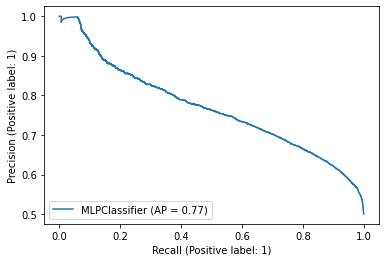

In [ ]:
mtr.plot_precision_recall_curve(clf, Xtest, ytest)

A curva de recall-precision mostra a compensação entre precision e recall para diferentes limiares. Uma área alta sob a curva representa alta revocação e alta precisão, onde alta precisão está relacionada a uma baixa taxa de falsos positivos e alta recall está relacionada a uma baixa taxa de falsos negativos. Neste caso o valor de AP (Average Precision) resume o gráfico como a média ponderada de precisões alcançadas em cada limiar, com o aumento na recuperação do limite anterior usado como o peso, um valor de AP de 0.78 neste gráfico é considerado satisfatório.

O valor de Average Precision de 0.77 indica que o modelo consegue ter uma precision e recall satisfatória.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


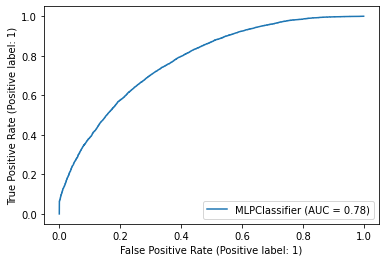

In [ ]:
mtr.plot_roc_curve(clf, Xtest, ytest)

Uma curva ROC (Curva aracterística de Operação do Receptor) é um gráfico que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. Esta curva demonstra a relação de dois parâmetros a taxa de True Positives e False Positives. Com o valor desejado sendo o mais próximo possível de 1, a ROC obtida não é perfeita, mas pode ser considerada mais do que aceitável. Uma área sob a curva (AUC) de 0.78 significa que o desempenho do modelo em distinguir entre as classes positivas e negativas é satisfatório.

Um aumento do número de neurónios e camadas numa rede neuronal pode de facto resultar num consequente aumento da performance do modelo, mas assim como foi provado neste projeto, nem sempre é o caso. Como podemos verificar, a rede neuronal apresentou melhores resultados apoiados por significância estatística quando utilizou um número reduzido, mas contudo equilibrado tanto de neurónios como camadas. Após comparação com todos os modelos treinados anteriormente, a rede neuronal com melhor performance provou ser a que se constituía com 50 neurónios em apenas uma camada, com a função de ativação ‘ReLU’.

## Conclusions

| Metric | Naive Bayes | Decision Tree | Random Forest | KNN | SVM | NN |
|---| --- | --- | --- | --- | --- | --- |
|Accuracy|0.69|0.69|0.70|0.68|0.70|0.70
|F1|0.71|0.71|0.71|0.70|0.71|0.72
|Precision|0.69|0.69|0.69|0.67|0.67|0.68
|Recall|0.67|0.73|0.74|0.73|0.75|0.77
|Specificity|0.63|0.67|0.67|0.63|0.64|0.63
|AP||0.75|0.77|0.73|0.75|0.77
|AUC ROC|0.75|0.77|0.78|0.76|0.76|0.78

Ao longo deste projeto aplicamos os diversos passos do CRISP-DM de modo a traduzirmos o problema de classificação de pacientes de COVID-19 mexicanos para um problema clássico de classificação de análise de dados.

Conseguimos aplicar diversos modelos de Machine-Learning que nos permitiram obter modelos preditivos com grau de performance decente do ponto de vista de capacidade de discriminação das classes, contudo não aceitável num contexto médico para uma decisão tão importante de vida ou de morte. Precisávamos de modelos mais robustos.

Não conseguimos detectar grandes diferenças na performance no teste entre os algoritmos que foram aplicados. Os diferentes valores são todos muito semelhantes, cabendo numa estreita faixa de variação.

É possível que a nossa simplificação do dataset tenha contribuído para os resultados não tão animadores como podia ser de esperar. No entanto, como principiantes em data science e programação no geral sentimos alguma realização em finalmente conseguir aplicar modelos com algum poder preditivo, por tão baixo que seja neste contexto.
